In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2
import csv
import os
import math 
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

from tqdm.notebook import tqdm
from ipywidgets import interact

from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from skimage.transform import resize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
# Dataset Paths
dataset_path = r"/content/gdrive/Shareddrives/Tugas Akhir/Dataset"

json_feature_norm = os.path.join(dataset_path, 'df_feature_norm.json')
json_feature_axes = os.path.join(dataset_path, 'df_feature_axes.json')
json_feature_rim = os.path.join(dataset_path, 'df_feature_rim.json')
json_class_norm = os.path.join(dataset_path, 'df_class_norm.json')
json_class_axes = os.path.join(dataset_path, 'df_class_axes.json')
json_class_rim = os.path.join(dataset_path, 'df_class_rim.json')

In [ ]:
df_feature_norm = pd.read_json(json_feature_norm)
df_feature_norm = df_feature_norm.reset_index(drop=True)
df_feature_norm.groupby(['dataset', 'tag']).size()

dataset       tag     
drishti       Glaucoma     32
              Normal       18
refuge test   Glaucoma     40
              Normal      360
refuge train  Glaucoma     40
              Normal      360
refuge val    Glaucoma     38
              Normal      360
dtype: int64

In [ ]:
df_feature_axes = pd.read_json(json_feature_axes)
df_feature_axes = df_feature_axes.reset_index(drop=True)
df_feature_axes.groupby(['dataset', 'tag']).size()

dataset       tag     
drishti       Glaucoma     32
              Normal       18
refuge test   Glaucoma     40
              Normal      360
refuge train  Glaucoma     40
              Normal      360
refuge val    Glaucoma     38
              Normal      360
dtype: int64

In [ ]:
df_feature_rim = pd.read_json(json_feature_rim)
df_feature_rim = df_feature_rim.reset_index(drop=True)
df_feature_rim.groupby(['dataset', 'tag']).size()

dataset       tag     
drishti       Glaucoma     32
              Normal       18
refuge test   Glaucoma     40
              Normal      360
refuge train  Glaucoma     40
              Normal      360
refuge val    Glaucoma     38
              Normal      360
dtype: int64

# Explore Data

## Norm

In [ ]:
df_norm_drishti = df_feature_norm.loc[df_feature_norm['dataset'] == 'drishti']
df_norm_refuge = df_feature_norm.loc[df_feature_norm['dataset'] == 'refuge train']
df_norm_refugeval = df_feature_norm.loc[df_feature_norm['dataset'] == 'refuge val']
df_norm_refugetest = df_feature_norm.loc[df_feature_norm['dataset'] == 'refuge test']

### Box Plot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

Text(0.5, 0.98, 'Box Plot CDR Ground Truth Sumbu Normal')

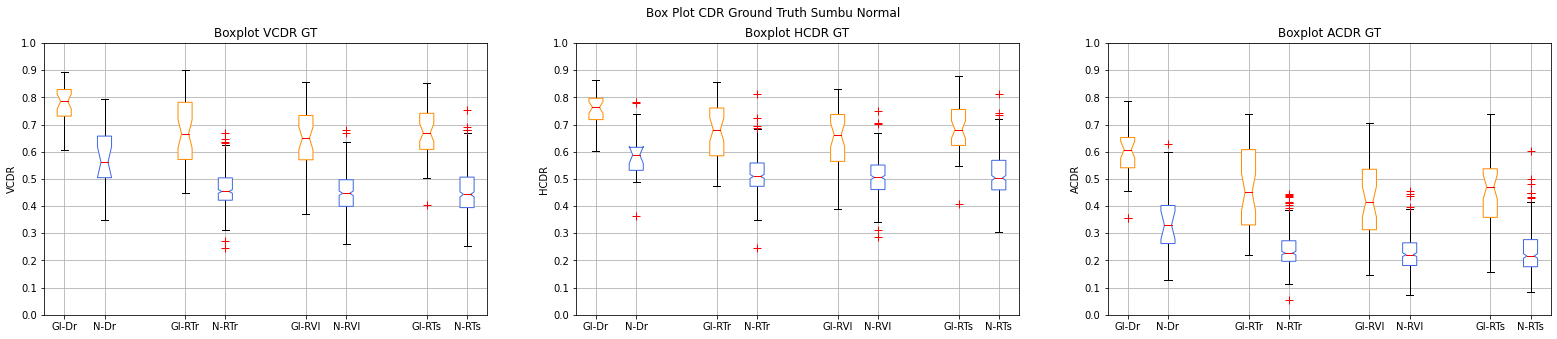

In [ ]:
plt.figure(figsize=(27, 5))
flierprops = dict(marker='+', markerfacecolor='g', markersize=8,
                  linestyle='none', markeredgecolor='r')
glprops = dict(color='darkorange', facecolor='w')
nprops = dict(color='royalblue',facecolor='w')
medianprops = dict(color='r')

data_VCDR_gl  = [df_norm_drishti['VCDR_gt'].loc[df_norm_drishti['tag'] == 'Glaucoma'].to_list(),
                 df_norm_refuge['VCDR_gt'].loc[df_norm_refuge['tag'] == 'Glaucoma'].to_list(),
                 df_norm_refugeval['VCDR_gt'].loc[df_norm_refugeval['tag'] == 'Glaucoma'].to_list(),
                 df_norm_refugetest['VCDR_gt'].loc[df_norm_refugetest['tag'] == 'Glaucoma'].to_list()]
data_VCDR_n   = [df_norm_drishti['VCDR_gt'].loc[df_norm_drishti['tag'] == 'Normal'].to_list(),
                 df_norm_refuge['VCDR_gt'].loc[df_norm_refuge['tag'] == 'Normal'].to_list(),
                 df_norm_refugeval['VCDR_gt'].loc[df_norm_refugeval['tag'] == 'Normal'].to_list(),
                 df_norm_refugetest['VCDR_gt'].loc[df_norm_refugetest['tag'] == 'Normal'].to_list()]

data_HCDR_gl  = [df_norm_drishti['HCDR_gt'].loc[df_norm_drishti['tag'] == 'Glaucoma'].to_list(),
                 df_norm_refuge['HCDR_gt'].loc[df_norm_refuge['tag'] == 'Glaucoma'].to_list(),
                 df_norm_refugeval['HCDR_gt'].loc[df_norm_refugeval['tag'] == 'Glaucoma'].to_list(),
                 df_norm_refugetest['HCDR_gt'].loc[df_norm_refugetest['tag'] == 'Glaucoma'].to_list()]
data_HCDR_n   = [df_norm_drishti['HCDR_gt'].loc[df_norm_drishti['tag'] == 'Normal'].to_list(),
                 df_norm_refuge['HCDR_gt'].loc[df_norm_refuge['tag'] == 'Normal'].to_list(),
                 df_norm_refugeval['HCDR_gt'].loc[df_norm_refugeval['tag'] == 'Normal'].to_list(),
                 df_norm_refugetest['HCDR_gt'].loc[df_norm_refugetest['tag'] == 'Normal'].to_list()]

data_ACDR_gl  = [df_norm_drishti['ACDR_gt'].loc[df_norm_drishti['tag'] == 'Glaucoma'].to_list(),
                 df_norm_refuge['ACDR_gt'].loc[df_norm_refuge['tag'] == 'Glaucoma'].to_list(),
                 df_norm_refugeval['ACDR_gt'].loc[df_norm_refugeval['tag'] == 'Glaucoma'].to_list(),
                 df_norm_refugetest['ACDR_gt'].loc[df_norm_refugetest['tag'] == 'Glaucoma'].to_list()]
data_ACDR_n  = [df_norm_drishti['ACDR_gt'].loc[df_norm_drishti['tag'] == 'Normal'].to_list(),
                 df_norm_refuge['ACDR_gt'].loc[df_norm_refuge['tag'] == 'Normal'].to_list(),
                 df_norm_refugeval['ACDR_gt'].loc[df_norm_refugeval['tag'] == 'Normal'].to_list(),
                 df_norm_refugetest['ACDR_gt'].loc[df_norm_refugetest['tag'] == 'Normal'].to_list()]

plt.subplot(1,3,1), 
plt.boxplot(data_VCDR_gl, notch=True, positions=[1, 4, 7, 10], widths=0.35, flierprops=flierprops, boxprops=glprops, medianprops=medianprops, patch_artist=True)
plt.boxplot(data_VCDR_n, notch=True, positions=[2, 5, 8, 11], widths=0.35,flierprops=flierprops, boxprops=nprops, medianprops=medianprops, patch_artist=True)
plt.grid()
plt.yticks(ticks=[x*0.1 for x in range(0, 11)])
plt.ylabel('VCDR')
# plt.axhline(0.52, color = 'r', linestyle = '--', label = 'threshold')
plt.xticks([1, 4, 7, 10, 2, 5, 8, 11], labels=['Gl-Dr', 'Gl-RTr', 'Gl-RVl', 'Gl-RTs',
                                             'N-Dr', 'N-RTr', 'N-RVl', 'N-RTs'])
plt.title('Boxplot VCDR GT')

plt.subplot(1,3,2)
plt.boxplot(data_HCDR_gl, notch=True, positions=[1, 4, 7, 10], widths=0.35,flierprops=flierprops, boxprops=glprops, medianprops=medianprops, patch_artist=True)
plt.boxplot(data_HCDR_n, notch=True, positions=[2, 5, 8, 11], widths=0.35,flierprops=flierprops, boxprops=nprops, medianprops=medianprops, patch_artist=True)
plt.grid()
plt.yticks(ticks=[x*0.1 for x in range(0, 11)])
plt.ylabel('HCDR')
# plt.axhline(0.52, color = 'r', linestyle = '--', label = 'threshold')
plt.xticks([1, 4, 7, 10, 2, 5, 8, 11], labels=['Gl-Dr', 'Gl-RTr', 'Gl-RVl', 'Gl-RTs',
                                             'N-Dr', 'N-RTr', 'N-RVl', 'N-RTs'])
plt.title('Boxplot HCDR GT')

plt.subplot(1,3,3), 
plt.boxplot(data_ACDR_gl, notch=True, positions=[1, 4, 7, 10], widths=0.35, flierprops=flierprops, boxprops=glprops, medianprops=medianprops, patch_artist=True)
plt.boxplot(data_ACDR_n, notch=True, positions=[2, 5, 8, 11], widths=0.35, flierprops=flierprops, boxprops=nprops, medianprops=medianprops, patch_artist=True)
plt.grid()
plt.yticks(ticks=[x*0.1 for x in range(0, 11)])
plt.ylabel('ACDR')
# plt.axhline(0.52, color = 'r', linestyle = '--', label = 'threshold')
plt.xticks([1, 4, 7, 10, 2, 5, 8, 11], labels=['Gl-Dr', 'Gl-RTr', 'Gl-RVl', 'Gl-RTs',
                                             'N-Dr', 'N-RTr', 'N-RVl', 'N-RTs'])

plt.title('Boxplot ACDR GT')

plt.suptitle('Box Plot CDR Ground Truth Sumbu Normal')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

Text(0.5, 0.98, 'Box Plot CDR Prediction Sumbu Normal')

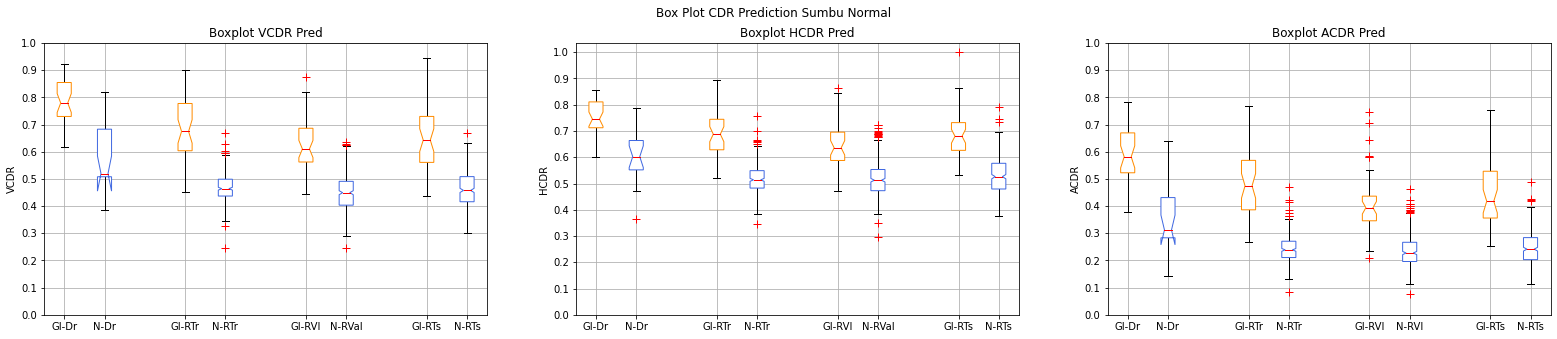

In [ ]:
plt.figure(figsize=(27, 5))
flierprops = dict(marker='+', markerfacecolor='g', markersize=8,
                  linestyle='none', markeredgecolor='r')
glprops = dict(color='darkorange', facecolor='w')
nprops = dict(color='royalblue',facecolor='w')
medianprops = dict(color='r')

data_VCDR_gl  = [df_norm_drishti['VCDR'].loc[df_norm_drishti['tag'] == 'Glaucoma'].to_list(),
                 df_norm_refuge['VCDR'].loc[df_norm_refuge['tag'] == 'Glaucoma'].to_list(),
                 df_norm_refugeval['VCDR'].loc[df_norm_refugeval['tag'] == 'Glaucoma'].to_list(),
                 df_norm_refugetest['VCDR'].loc[df_norm_refugetest['tag'] == 'Glaucoma'].to_list()]
data_VCDR_n   = [df_norm_drishti['VCDR'].loc[df_norm_drishti['tag'] == 'Normal'].to_list(),
                 df_norm_refuge['VCDR'].loc[df_norm_refuge['tag'] == 'Normal'].to_list(),
                 df_norm_refugeval['VCDR'].loc[df_norm_refugeval['tag'] == 'Normal'].to_list(),
                 df_norm_refugetest['VCDR'].loc[df_norm_refugetest['tag'] == 'Normal'].to_list()]

data_HCDR_gl  = [df_norm_drishti['HCDR'].loc[df_norm_drishti['tag'] == 'Glaucoma'].to_list(),
                 df_norm_refuge['HCDR'].loc[df_norm_refuge['tag'] == 'Glaucoma'].to_list(),
                 df_norm_refugeval['HCDR'].loc[df_norm_refugeval['tag'] == 'Glaucoma'].to_list(),
                 df_norm_refugetest['HCDR'].loc[df_norm_refugetest['tag'] == 'Glaucoma'].to_list()]
data_HCDR_n   = [df_norm_drishti['HCDR'].loc[df_norm_drishti['tag'] == 'Normal'].to_list(),
                 df_norm_refuge['HCDR'].loc[df_norm_refuge['tag'] == 'Normal'].to_list(),
                 df_norm_refugeval['HCDR'].loc[df_norm_refugeval['tag'] == 'Normal'].to_list(),
                 df_norm_refugetest['HCDR'].loc[df_norm_refugetest['tag'] == 'Normal'].to_list()]

data_ACDR_gl  = [df_norm_drishti['ACDR'].loc[df_norm_drishti['tag'] == 'Glaucoma'].to_list(),
                 df_norm_refuge['ACDR'].loc[df_norm_refuge['tag'] == 'Glaucoma'].to_list(),
                 df_norm_refugeval['ACDR'].loc[df_norm_refugeval['tag'] == 'Glaucoma'].to_list(),
                 df_norm_refugetest['ACDR'].loc[df_norm_refugetest['tag'] == 'Glaucoma'].to_list()]
data_ACDR_n  = [df_norm_drishti['ACDR'].loc[df_norm_drishti['tag'] == 'Normal'].to_list(),
                 df_norm_refuge['ACDR'].loc[df_norm_refuge['tag'] == 'Normal'].to_list(),
                 df_norm_refugeval['ACDR'].loc[df_norm_refugeval['tag'] == 'Normal'].to_list(),
                 df_norm_refugetest['ACDR'].loc[df_norm_refugetest['tag'] == 'Normal'].to_list()]

plt.subplot(1,3,1), 
plt.boxplot(data_VCDR_gl, notch=True, positions=[1, 4, 7, 10], widths=0.35, flierprops=flierprops, boxprops=glprops, medianprops=medianprops, patch_artist=True)
plt.boxplot(data_VCDR_n, notch=True, positions=[2, 5, 8, 11], widths=0.35,flierprops=flierprops, boxprops=nprops, medianprops=medianprops, patch_artist=True)
plt.grid()
plt.yticks(ticks=[x*0.1 for x in range(0, 11)])
plt.ylabel('VCDR')
# plt.axhline(0.52, color = 'r', linestyle = '--', label = 'threshold')
plt.xticks([1, 4, 7, 10, 2, 5, 8, 11], labels=['Gl-Dr', 'Gl-RTr', 'Gl-RVl', 'Gl-RTs',
                                             'N-Dr', 'N-RTr', 'N-RVal', 'N-RTs'])
plt.title('Boxplot VCDR Pred')

plt.subplot(1,3,2)
plt.boxplot(data_HCDR_gl, notch=True, positions=[1, 4, 7, 10], widths=0.35,flierprops=flierprops, boxprops=glprops, medianprops=medianprops, patch_artist=True)
plt.boxplot(data_HCDR_n, notch=True, positions=[2, 5, 8, 11], widths=0.35,flierprops=flierprops, boxprops=nprops, medianprops=medianprops, patch_artist=True)
plt.grid()
plt.yticks(ticks=[x*0.1 for x in range(0, 11)])
plt.ylabel('HCDR')
# plt.axhline(0.52, color = 'r', linestyle = '--', label = 'threshold')
plt.xticks([1, 4, 7, 10, 2, 5, 8, 11], labels=['Gl-Dr', 'Gl-RTr', 'Gl-RVl', 'Gl-RTs',
                                             'N-Dr', 'N-RTr', 'N-RVal', 'N-RTs'])
plt.title('Boxplot HCDR Pred')

plt.subplot(1,3,3), 
plt.boxplot(data_ACDR_gl, notch=True, positions=[1, 4, 7, 10], widths=0.35, flierprops=flierprops, boxprops=glprops, medianprops=medianprops, patch_artist=True)
plt.boxplot(data_ACDR_n, notch=True, positions=[2, 5, 8, 11], widths=0.35, flierprops=flierprops, boxprops=nprops, medianprops=medianprops, patch_artist=True)
plt.grid()
plt.yticks(ticks=[x*0.1 for x in range(0, 11)])
plt.ylabel('ACDR')
# plt.axhline(0.52, color = 'r', linestyle = '--', label = 'threshold')
plt.xticks([1, 4, 7, 10, 2, 5, 8, 11], labels=['Gl-Dr', 'Gl-RTr', 'Gl-RVl', 'Gl-RTs',
                                             'N-Dr', 'N-RTr', 'N-RVl', 'N-RTs'])

plt.title('Boxplot ACDR Pred')

plt.suptitle('Box Plot CDR Prediction Sumbu Normal')

## Axes

In [ ]:
df_axes_drishti = df_feature_axes.loc[df_feature_axes['dataset'] == 'drishti']
df_axes_refuge = df_feature_axes.loc[df_feature_axes['dataset'] == 'refuge train']
df_axes_refugeval = df_feature_axes.loc[df_feature_axes['dataset'] == 'refuge val']
df_axes_refugetest = df_feature_axes.loc[df_feature_axes['dataset'] == 'refuge test']

### Box Plot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

Text(0.5, 0.98, 'Box Plot CDR Ground Truth Sumbu Minor-Major')

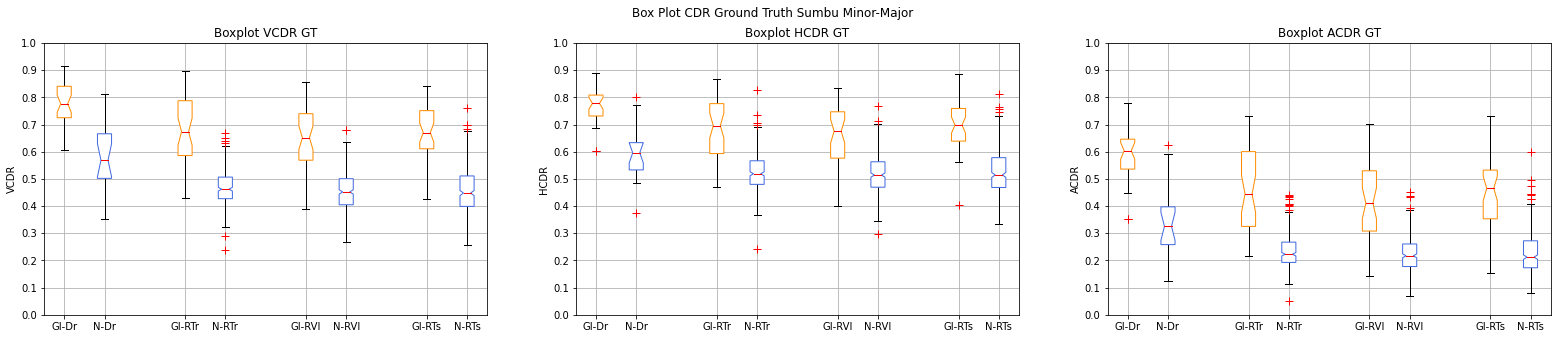

In [ ]:
plt.figure(figsize=(27, 5))
flierprops = dict(marker='+', markerfacecolor='g', markersize=8,
                  linestyle='none', markeredgecolor='r')
glprops = dict(color='darkorange', facecolor='w')
nprops = dict(color='royalblue',facecolor='w')
medianprops = dict(color='r')

data_VCDR_gl  = [df_axes_drishti['VCDR_gt'].loc[df_axes_drishti['tag'] == 'Glaucoma'].to_list(),
                 df_axes_refuge['VCDR_gt'].loc[df_axes_refuge['tag'] == 'Glaucoma'].to_list(),
                 df_axes_refugeval['VCDR_gt'].loc[df_axes_refugeval['tag'] == 'Glaucoma'].to_list(),
                 df_axes_refugetest['VCDR_gt'].loc[df_axes_refugetest['tag'] == 'Glaucoma'].to_list()]
data_VCDR_n   = [df_axes_drishti['VCDR_gt'].loc[df_axes_drishti['tag'] == 'Normal'].to_list(),
                 df_axes_refuge['VCDR_gt'].loc[df_axes_refuge['tag'] == 'Normal'].to_list(),
                 df_axes_refugeval['VCDR_gt'].loc[df_axes_refugeval['tag'] == 'Normal'].to_list(),
                 df_axes_refugetest['VCDR_gt'].loc[df_axes_refugetest['tag'] == 'Normal'].to_list()]

data_HCDR_gl  = [df_axes_drishti['HCDR_gt'].loc[df_axes_drishti['tag'] == 'Glaucoma'].to_list(),
                 df_axes_refuge['HCDR_gt'].loc[df_axes_refuge['tag'] == 'Glaucoma'].to_list(),
                 df_axes_refugeval['HCDR_gt'].loc[df_axes_refugeval['tag'] == 'Glaucoma'].to_list(),
                 df_axes_refugetest['HCDR_gt'].loc[df_axes_refugetest['tag'] == 'Glaucoma'].to_list()]
data_HCDR_n   = [df_axes_drishti['HCDR_gt'].loc[df_axes_drishti['tag'] == 'Normal'].to_list(),
                 df_axes_refuge['HCDR_gt'].loc[df_axes_refuge['tag'] == 'Normal'].to_list(),
                 df_axes_refugeval['HCDR_gt'].loc[df_axes_refugeval['tag'] == 'Normal'].to_list(),
                 df_axes_refugetest['HCDR_gt'].loc[df_axes_refugetest['tag'] == 'Normal'].to_list()]

data_ACDR_gl  = [df_axes_drishti['ACDR_gt'].loc[df_axes_drishti['tag'] == 'Glaucoma'].to_list(),
                 df_axes_refuge['ACDR_gt'].loc[df_axes_refuge['tag'] == 'Glaucoma'].to_list(),
                 df_axes_refugeval['ACDR_gt'].loc[df_axes_refugeval['tag'] == 'Glaucoma'].to_list(),
                 df_axes_refugetest['ACDR_gt'].loc[df_axes_refugetest['tag'] == 'Glaucoma'].to_list()]
data_ACDR_n  = [df_axes_drishti['ACDR_gt'].loc[df_axes_drishti['tag'] == 'Normal'].to_list(),
                 df_axes_refuge['ACDR_gt'].loc[df_axes_refuge['tag'] == 'Normal'].to_list(),
                 df_axes_refugeval['ACDR_gt'].loc[df_axes_refugeval['tag'] == 'Normal'].to_list(),
                 df_axes_refugetest['ACDR_gt'].loc[df_axes_refugetest['tag'] == 'Normal'].to_list()]

plt.subplot(1,3,1), 
plt.boxplot(data_VCDR_gl, notch=True, positions=[1, 4, 7, 10], widths=0.35, flierprops=flierprops, boxprops=glprops, medianprops=medianprops, patch_artist=True)
plt.boxplot(data_VCDR_n, notch=True, positions=[2, 5, 8, 11], widths=0.35,flierprops=flierprops, boxprops=nprops, medianprops=medianprops, patch_artist=True)
plt.grid()
plt.yticks(ticks=[x*0.1 for x in range(0, 11)])
plt.ylabel('VCDR')
# plt.axhline(0.52, color = 'r', linestyle = '--', label = 'threshold')
plt.xticks([1, 4, 7, 10, 2, 5, 8, 11], labels=['Gl-Dr', 'Gl-RTr', 'Gl-RVl', 'Gl-RTs',
                                             'N-Dr', 'N-RTr', 'N-RVl', 'N-RTs'])
plt.title('Boxplot VCDR GT')

plt.subplot(1,3,2)
plt.boxplot(data_HCDR_gl, notch=True, positions=[1, 4, 7, 10], widths=0.35,flierprops=flierprops, boxprops=glprops, medianprops=medianprops, patch_artist=True)
plt.boxplot(data_HCDR_n, notch=True, positions=[2, 5, 8, 11], widths=0.35,flierprops=flierprops, boxprops=nprops, medianprops=medianprops, patch_artist=True)
plt.grid()
plt.yticks(ticks=[x*0.1 for x in range(0, 11)])
plt.ylabel('HCDR')
# plt.axhline(0.52, color = 'r', linestyle = '--', label = 'threshold')
plt.xticks([1, 4, 7, 10, 2, 5, 8, 11], labels=['Gl-Dr', 'Gl-RTr', 'Gl-RVl', 'Gl-RTs',
                                             'N-Dr', 'N-RTr', 'N-RVl', 'N-RTs'])
plt.title('Boxplot HCDR GT')

plt.subplot(1,3,3), 
plt.boxplot(data_ACDR_gl, notch=True, positions=[1, 4, 7, 10], widths=0.35, flierprops=flierprops, boxprops=glprops, medianprops=medianprops, patch_artist=True)
plt.boxplot(data_ACDR_n, notch=True, positions=[2, 5, 8, 11], widths=0.35, flierprops=flierprops, boxprops=nprops, medianprops=medianprops, patch_artist=True)
plt.grid()
plt.yticks(ticks=[x*0.1 for x in range(0, 11)])
plt.ylabel('ACDR')
# plt.axhline(0.52, color = 'r', linestyle = '--', label = 'threshold')
plt.xticks([1, 4, 7, 10, 2, 5, 8, 11], labels=['Gl-Dr', 'Gl-RTr', 'Gl-RVl', 'Gl-RTs',
                                             'N-Dr', 'N-RTr', 'N-RVl', 'N-RTs'])

plt.title('Boxplot ACDR GT')
plt.suptitle('Box Plot CDR Ground Truth Sumbu Minor-Major')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

Text(0.5, 0.98, 'Box Plot CDR Prediction Sumbu Minor-Major')

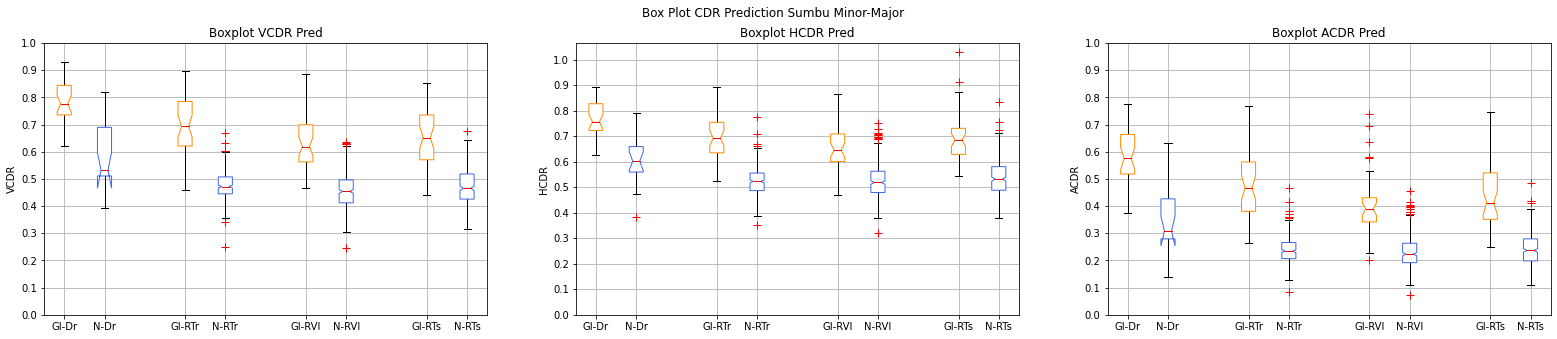

In [ ]:
plt.figure(figsize=(27, 5))
flierprops = dict(marker='+', markerfacecolor='g', markersize=8,
                  linestyle='none', markeredgecolor='r')
glprops = dict(color='darkorange', facecolor='w')
nprops = dict(color='royalblue',facecolor='w')
medianprops = dict(color='r')

data_VCDR_gl  = [df_axes_drishti['VCDR'].loc[df_axes_drishti['tag'] == 'Glaucoma'].to_list(),
                 df_axes_refuge['VCDR'].loc[df_axes_refuge['tag'] == 'Glaucoma'].to_list(),
                 df_axes_refugeval['VCDR'].loc[df_axes_refugeval['tag'] == 'Glaucoma'].to_list(),
                 df_axes_refugetest['VCDR'].loc[df_axes_refugetest['tag'] == 'Glaucoma'].to_list()]
data_VCDR_n   = [df_axes_drishti['VCDR'].loc[df_axes_drishti['tag'] == 'Normal'].to_list(),
                 df_axes_refuge['VCDR'].loc[df_axes_refuge['tag'] == 'Normal'].to_list(),
                 df_axes_refugeval['VCDR'].loc[df_axes_refugeval['tag'] == 'Normal'].to_list(),
                 df_axes_refugetest['VCDR'].loc[df_axes_refugetest['tag'] == 'Normal'].to_list()]

data_HCDR_gl  = [df_axes_drishti['HCDR'].loc[df_axes_drishti['tag'] == 'Glaucoma'].to_list(),
                 df_axes_refuge['HCDR'].loc[df_axes_refuge['tag'] == 'Glaucoma'].to_list(),
                 df_axes_refugeval['HCDR'].loc[df_axes_refugeval['tag'] == 'Glaucoma'].to_list(),
                 df_axes_refugetest['HCDR'].loc[df_axes_refugetest['tag'] == 'Glaucoma'].to_list()]
data_HCDR_n   = [df_axes_drishti['HCDR'].loc[df_axes_drishti['tag'] == 'Normal'].to_list(),
                 df_axes_refuge['HCDR'].loc[df_axes_refuge['tag'] == 'Normal'].to_list(),
                 df_axes_refugeval['HCDR'].loc[df_axes_refugeval['tag'] == 'Normal'].to_list(),
                 df_axes_refugetest['HCDR'].loc[df_axes_refugetest['tag'] == 'Normal'].to_list()]

data_ACDR_gl  = [df_axes_drishti['ACDR'].loc[df_axes_drishti['tag'] == 'Glaucoma'].to_list(),
                 df_axes_refuge['ACDR'].loc[df_axes_refuge['tag'] == 'Glaucoma'].to_list(),
                 df_axes_refugeval['ACDR'].loc[df_axes_refugeval['tag'] == 'Glaucoma'].to_list(),
                 df_axes_refugetest['ACDR'].loc[df_axes_refugetest['tag'] == 'Glaucoma'].to_list()]
data_ACDR_n  = [df_axes_drishti['ACDR'].loc[df_axes_drishti['tag'] == 'Normal'].to_list(),
                 df_axes_refuge['ACDR'].loc[df_axes_refuge['tag'] == 'Normal'].to_list(),
                 df_axes_refugeval['ACDR'].loc[df_axes_refugeval['tag'] == 'Normal'].to_list(),
                 df_axes_refugetest['ACDR'].loc[df_axes_refugetest['tag'] == 'Normal'].to_list()]

plt.subplot(1,3,1), 
plt.boxplot(data_VCDR_gl, notch=True, positions=[1, 4, 7, 10], widths=0.35, flierprops=flierprops, boxprops=glprops, medianprops=medianprops, patch_artist=True)
plt.boxplot(data_VCDR_n, notch=True, positions=[2, 5, 8, 11], widths=0.35,flierprops=flierprops, boxprops=nprops, medianprops=medianprops, patch_artist=True)
plt.grid()
plt.yticks(ticks=[x*0.1 for x in range(0, 11)])
plt.ylabel('VCDR')
# plt.axhline(0.52, color = 'r', linestyle = '--', label = 'threshold')
plt.xticks([1, 4, 7, 10, 2, 5, 8, 11], labels=['Gl-Dr', 'Gl-RTr', 'Gl-RVl', 'Gl-RTs',
                                             'N-Dr', 'N-RTr', 'N-RVl', 'N-RTs'])
plt.title('Boxplot VCDR Pred')

plt.subplot(1,3,2)
plt.boxplot(data_HCDR_gl, notch=True, positions=[1, 4, 7, 10], widths=0.35,flierprops=flierprops, boxprops=glprops, medianprops=medianprops, patch_artist=True)
plt.boxplot(data_HCDR_n, notch=True, positions=[2, 5, 8, 11], widths=0.35,flierprops=flierprops, boxprops=nprops, medianprops=medianprops, patch_artist=True)
plt.grid()
plt.yticks(ticks=[x*0.1 for x in range(0, 11)])
plt.ylabel('HCDR')
# plt.axhline(0.52, color = 'r', linestyle = '--', label = 'threshold')
plt.xticks([1, 4, 7, 10, 2, 5, 8, 11], labels=['Gl-Dr', 'Gl-RTr', 'Gl-RVl', 'Gl-RTs',
                                             'N-Dr', 'N-RTr', 'N-RVl', 'N-RTs'])
plt.title('Boxplot HCDR Pred')

plt.subplot(1,3,3), 
plt.boxplot(data_ACDR_gl, notch=True, positions=[1, 4, 7, 10], widths=0.35, flierprops=flierprops, boxprops=glprops, medianprops=medianprops, patch_artist=True)
plt.boxplot(data_ACDR_n, notch=True, positions=[2, 5, 8, 11], widths=0.35, flierprops=flierprops, boxprops=nprops, medianprops=medianprops, patch_artist=True)
plt.grid()
plt.yticks(ticks=[x*0.1 for x in range(0, 11)])
plt.ylabel('ACDR')
# plt.axhline(0.52, color = 'r', linestyle = '--', label = 'threshold')
plt.xticks([1, 4, 7, 10, 2, 5, 8, 11], labels=['Gl-Dr', 'Gl-RTr', 'Gl-RVl', 'Gl-RTs',
                                             'N-Dr', 'N-RTr', 'N-RVl', 'N-RTs'])
plt.title('Boxplot ACDR Pred')

plt.suptitle('Box Plot CDR Prediction Sumbu Minor-Major')

## RDR

In [ ]:
df_rim_drishti = df_feature_rim.loc[df_feature_rim['dataset'] == 'drishti']
df_rim_refuge = df_feature_rim.loc[df_feature_rim['dataset'] == 'refuge train']
df_rim_refugeval = df_feature_rim.loc[df_feature_rim['dataset'] == 'refuge val']
df_rim_refugetest = df_feature_rim.loc[df_feature_rim['dataset'] == 'refuge test']

### Box Plot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

Text(0.5, 0.98, 'Box Plot RDR Prediction dan Ground Truth')

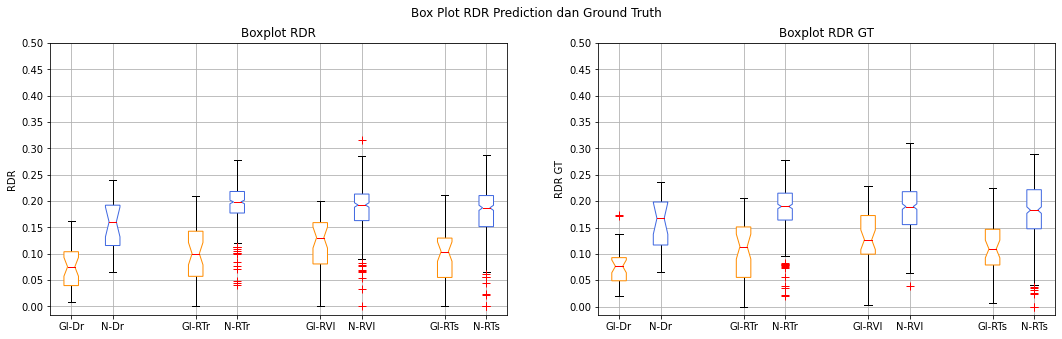

In [ ]:
plt.figure(figsize=(18, 5))
flierprops = dict(marker='+', markerfacecolor='g', markersize=8,
                  linestyle='none', markeredgecolor='r')
glprops = dict(color='darkorange', facecolor='w')
nprops = dict(color='royalblue',facecolor='w')
medianprops = dict(color='r')

data_RDR_gl  = [df_rim_drishti['RDR'].loc[df_rim_drishti['tag'] == 'Glaucoma'].to_list(),
                 df_rim_refuge['RDR'].loc[df_rim_refuge['tag'] == 'Glaucoma'].to_list(),
                 df_rim_refugeval['RDR'].loc[df_rim_refugeval['tag'] == 'Glaucoma'].to_list(),
                 df_rim_refugetest['RDR'].loc[df_rim_refugetest['tag'] == 'Glaucoma'].to_list()]
data_RDR_n   = [df_rim_drishti['RDR'].loc[df_rim_drishti['tag'] == 'Normal'].to_list(),
                 df_rim_refuge['RDR'].loc[df_rim_refuge['tag'] == 'Normal'].to_list(),
                 df_rim_refugeval['RDR'].loc[df_rim_refugeval['tag'] == 'Normal'].to_list(),
                 df_rim_refugetest['RDR'].loc[df_rim_refugetest['tag'] == 'Normal'].to_list()]

data_RDRgt_gl  = [df_rim_drishti['RDR_gt'].loc[df_rim_drishti['tag'] == 'Glaucoma'].to_list(),
                 df_rim_refuge['RDR_gt'].loc[df_rim_refuge['tag'] == 'Glaucoma'].to_list(),
                 df_rim_refugeval['RDR_gt'].loc[df_rim_refugeval['tag'] == 'Glaucoma'].to_list(),
                 df_rim_refugetest['RDR_gt'].loc[df_rim_refugetest['tag'] == 'Glaucoma'].to_list()]
data_RDRgt_n   = [df_rim_drishti['RDR_gt'].loc[df_rim_drishti['tag'] == 'Normal'].to_list(),
                 df_rim_refuge['RDR_gt'].loc[df_rim_refuge['tag'] == 'Normal'].to_list(),
                 df_rim_refugeval['RDR_gt'].loc[df_rim_refugeval['tag'] == 'Normal'].to_list(),
                 df_rim_refugetest['RDR_gt'].loc[df_rim_refugetest['tag'] == 'Normal'].to_list()]

plt.subplot(1,2,1), 
plt.boxplot(data_RDR_gl, notch=True, positions=[1, 4, 7, 10], widths=0.35, flierprops=flierprops, boxprops=glprops, medianprops=medianprops, patch_artist=True)
plt.boxplot(data_RDR_n, notch=True, positions=[2, 5, 8, 11], widths=0.35,flierprops=flierprops, boxprops=nprops, medianprops=medianprops, patch_artist=True)
plt.grid()
plt.yticks(ticks=[x*0.05 for x in range(0, 11)])
plt.ylabel('RDR')
# plt.axhline(0.52, color = 'r', linestyle = '--', label = 'threshold')
plt.xticks([1, 4, 7, 10, 2, 5, 8, 11], labels=['Gl-Dr', 'Gl-RTr', 'Gl-RVl', 'Gl-RTs',
                                             'N-Dr', 'N-RTr', 'N-RVl', 'N-RTs'])
plt.title('Boxplot RDR')

plt.subplot(1,2,2)
plt.boxplot(data_RDRgt_gl, notch=True, positions=[1, 4, 7, 10], widths=0.35,flierprops=flierprops, boxprops=glprops, medianprops=medianprops, patch_artist=True)
plt.boxplot(data_RDRgt_n, notch=True, positions=[2, 5, 8, 11], widths=0.35,flierprops=flierprops, boxprops=nprops, medianprops=medianprops, patch_artist=True)
plt.grid()
plt.yticks(ticks=[x*0.05 for x in range(0, 11)])
plt.ylabel('RDR GT')
# plt.axhline(0.52, color = 'r', linestyle = '--', label = 'threshold')
plt.xticks([1, 4, 7, 10, 2, 5, 8, 11], labels=['Gl-Dr', 'Gl-RTr', 'Gl-RVl', 'Gl-RTs',
                                             'N-Dr', 'N-RTr', 'N-RVl', 'N-RTs'])
plt.title('Boxplot RDR GT')
plt.suptitle('Box Plot RDR Prediction dan Ground Truth')

# Functions

In [ ]:
def MeanScore(Fscore):
  mean = np.mean(Fscore)
  std = np.std(Fscore)
  print('{:.3f} \u00B1 {:.3f}'.format(mean, std))

In [ ]:
def getFeature(mask):
  cont, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
  cont = cv2.approxPolyDP(cont[0], 3, True)
  _, _, hor, ver = cv2.boundingRect(cont)
  area = np.sum(mask == 255)

  return ver, hor, area

def getCenter(mask):
  M = cv2.moments(mask)
  center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))

  return center

In [ ]:
def plot_metrik_threshold(thresholds, acc, sen, spe, youd, ax, i, fitur, dataset, n):
  X = thresholds
  y1 = acc
  y2 = sen
  y3 = spe
  y4 = youd

  max_youd = np.max(y4)
  t_youd = X[y4.index(max_youd)]
  idx = X.index(t_youd)
  max_acc = y1[idx]
  max_sen = y2[idx]
  max_spe = y3[idx]

  ax[i].plot(X, y1, color='royalblue', label='Accuracy')
  ax[i].plot(X, y2, color='orange', label='Sensitivity')
  ax[i].plot(X, y3, color='mediumseagreen', label='Specificity')
  ax[i].plot(X, y4, color='salmon', label='Youden index')
  ax[i].scatter(t_youd, max_acc, marker='o', color='royalblue', lw=0.25)
  ax[i].scatter(t_youd, max_sen, marker='o', color='orange', lw=0.25)
  ax[i].scatter(t_youd, max_spe, marker='o', color='mediumseagreen', lw=0.25)
  ax[i].scatter(t_youd, max_youd, marker='o', color='salmon', lw=0.25)

  ax[i].axvline(x=t_youd, linestyle='--', color='salmon', lw=1)

  ax[i].text(t_youd, 0.4, '{:.3f}'.format(t_youd), size='medium')
  ax[i].set_xlabel('Threshold')
  ax[i].set_ylabel('Metrik')
  ax[i].text(t_youd, max_acc, '{:.3f}'.format(max_acc), size='medium', color='darkblue')
  ax[i].text(t_youd, max_sen-0.01, '{:.3f}'.format(max_sen), size='medium', color='darkorange')
  ax[i].text(t_youd, max_spe+0.04, '{:.3f}'.format(max_spe), size='medium', color='darkgreen')
  ax[i].text(t_youd, max_youd, '{:.3f}'.format(max_youd), size='medium', color='red')
  ax[i].grid()
  ax[i].set_title('Nilai metrik {} {} (n={})'.format(fitur, dataset, n))
  ax[i].legend()

def all_threshold_metric(x_GT, y):
  X = x_GT
  y_true = y
  thresholds = []
  acc = []
  sen = []
  spe = []
  youd = []
  for i in range(100):
    thd = i*0.01
    y_pred = threshold_pred(X, threshold=thd)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    acc1, sen1, spe1, f1, youden = metrik(tn, fp, fn, tp)
    thresholds.append(thd)
    sen.append(sen1)
    spe.append(spe1)
    acc.append(acc1)
    youd.append(youden)
  return thresholds, acc, sen, spe, youd

In [ ]:
def metrik(tn, fp, fn, tp):
  acc = (tp + tn) / (tp + tn + fp + fn)
  sen = tp / (tp + fn)
  spe = tn / (tn + fp)
  f = 2*tp / (2*tp + fp + fn)
  youden = sen + spe - 1
  return acc, sen, spe, f, youden

def threshold_pred(CDRS, threshold=0.56):
  pred = []
  for CDR in CDRS:
    if CDR < threshold:
      pred.append(0)
    elif CDR >= threshold:
      pred.append(1)
  pred = np.array(pred)
  return pred

In [ ]:
def encoder(y):
  encoded = []
  for label in y:
    if label == 'Glaucoma':
      encoded.append(1)
    elif label == 'Normal':
      encoded.append(0)
  
  encoded = np.array(encoded)
  return encoded

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision   = cf[1,1] / sum(cf[:,1])
            recall      = cf[1,1] / sum(cf[1,:])
            spe         = cf[0,0] / sum(cf[0,:])
            f1_score    = 2*precision*recall / (precision + recall)
            stats_text  = "\n\nAccuracy={:0.3f}\nSpecificity={:0.3f}\nSensitivity={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,spe,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    # if figsize==None:
    #     #Get default figure size if not set
    #     figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    # plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
def confMat(y_true, y_pred, index, name, title):
  categories = ['Normal', 'Glaucoma']
  labels = ['True Neg','False Pos','False Neg','True Pos']
  f = plt.figure(figsize=((len(index)*5), 4))
  for i in range(len(index)):
    cfm = confusion_matrix(y_true[index[i]], y_pred[index[i]])
    ax = f.add_subplot(1,len(index),(i+1))
    make_confusion_matrix(cfm, group_names=labels, categories=categories, percent=False, cbar=False,
                          cmap="Purples", title='{}'.format(name[i]))
  plt.suptitle(title)
  plt.show()

# Train / Validation / Test Split

In [ ]:
ix_val = [782, 795, 806, 838, 815, 633, 843, 657, 798, 780, 595, 479, 594,
          530, 755, 533, 486, 516, 714, 509, 647, 503, 826, 753, 514, 515,
          688, 458, 498, 705, 505, 662, 825, 733, 741, 513, 833, 557, 506,
          703, 575, 555, 562, 511, 842, 572, 759, 616, 554, 810, 774, 585,
          663, 711, 742, 788, 808, 701, 470, 526, 722, 478, 758, 834, 508,
          832, 667, 556, 674, 499, 750, 635, 725, 536, 682, 784, 636, 454,
          752, 531, 645, 578, 519, 799, 677, 548, 600, 489, 660, 528, 763,
          791, 813, 459, 617, 596, 492, 766, 471, 824, 685, 817, 540, 619,
          512, 571, 748, 592, 567, 481, 501, 615, 551, 735, 614, 751, 673,
          632, 544, 829, 675, 553, 794, 839, 550, 524, 625, 691, 723, 715,
          804, 770, 686, 473, 491, 472, 582, 606, 569, 532, 681, 670, 597,
          756, 666, 661, 820, 710, 609, 743, 599, 453, 603, 730, 495, 593,
          692, 576, 541, 577, 709, 648, 793, 622, 760, 494, 640, 771, 835,
          608, 534, 549, 589, 583, 778, 463, 559, 584, 504, 538, 591, 634,
          724, 716, 563, 480, 598, 731, 655, 460, 484, 496, 529, 695, 652,
          819, 502, 605, 570]
ix_rtr  = [726, 690, 668, 607, 812, 637, 746, 580, 457, 537, 738, 467, 451,
          732, 507, 474, 712, 523, 697, 545, 765, 620, 787, 651, 823, 573,
          683, 520, 510, 646, 581, 814, 539, 749, 535, 468, 624, 558, 455,
          477, 801, 734, 642, 638, 757, 466, 522, 613, 564, 527, 643, 588,
          565, 626, 579, 665, 500, 543, 699, 772, 764, 574, 698, 768, 754,
          649, 696, 803, 487, 845, 702, 811, 792, 517, 546, 566, 561, 664,
          767, 816, 704, 822, 627, 587, 483, 493, 684, 740, 802, 831, 785,
          497, 630, 628, 727, 797, 805, 488, 728, 475, 639, 821, 601, 720,
          807, 669, 611, 586, 840, 552, 841, 464, 769, 462, 719, 789, 672,
          602, 604, 718, 736, 631, 476, 830, 713, 836, 694, 747, 629, 828,
          708, 452, 762, 542, 837, 485, 846, 689, 796, 676, 707, 456, 776,
          671, 653, 779, 844, 783, 693, 706, 590, 687, 547, 623, 737, 717,
          786, 800, 490, 827, 450, 721, 650, 658, 641, 659, 568, 612, 729,
          465, 654, 482, 818, 761, 461, 777, 621, 610, 521, 469, 678, 773,
          644, 518, 775, 656, 679, 700, 781, 680, 739, 847, 618, 525, 809,
          745, 744, 790, 560]

In [ ]:
ix_tr = np.concatenate((list(range(0, 450)), ix_rtr))
ix_tr = np.sort(ix_tr, axis=None)
ix_tes = np.array((list(range(848, 1248))))

In [ ]:
ix_drishti = np.array(list(range(0, 50)))
ix_refuge = np.array(list(range(50, 450)))
ix_refugeval = np.array(list(range(450, 848)))
ix_refugetest = np.array(list(range(848, 1248)))

# Norm Regression

## Build Model

In [ ]:
x1a_norm = df_feature_norm[['VCDR']].to_numpy()
x1b_norm = df_feature_norm[['HCDR']].to_numpy()
x1c_norm = df_feature_norm[['ACDR']].to_numpy()
x2a_norm = df_feature_norm[['VCDR', 'ACDR']].to_numpy()
x2b_norm = df_feature_norm[['VCDR', 'HCDR']].to_numpy()
x2c_norm = df_feature_norm[['ACDR', 'HCDR']].to_numpy()
x3_norm  = df_feature_norm[['VCDR', 'ACDR', 'HCDR']].to_numpy()

x1a_normGT = df_feature_norm[['VCDR_gt']].to_numpy()
x1b_normGT = df_feature_norm[['HCDR_gt']].to_numpy()
x1c_normGT = df_feature_norm[['ACDR_gt']].to_numpy()
x2a_normGT = df_feature_norm[['VCDR_gt', 'ACDR_gt']].to_numpy()
x2b_normGT = df_feature_norm[['VCDR_gt', 'HCDR_gt']].to_numpy()
x2c_normGT = df_feature_norm[['ACDR_gt', 'HCDR_gt']].to_numpy()
x3_normGT  = df_feature_norm[['VCDR_gt', 'ACDR_gt', 'HCDR_gt']].to_numpy()

y_norm = df_feature_norm['tag'].to_numpy()
y_norm = encoder(y_norm)

In [ ]:
# optimasi hyperparameter
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf1a_norm = GridSearchCV(LogisticRegression(solver='lbfgs', class_weight='balanced'), param_grid)
clf1b_norm = GridSearchCV(LogisticRegression(solver='lbfgs', class_weight='balanced'), param_grid)
clf1c_norm = GridSearchCV(LogisticRegression(solver='lbfgs', class_weight='balanced'), param_grid)
clf2a_norm = GridSearchCV(LogisticRegression(solver='lbfgs', class_weight='balanced'), param_grid)
clf2b_norm = GridSearchCV(LogisticRegression(solver='lbfgs', class_weight='balanced'), param_grid)
clf2c_norm = GridSearchCV(LogisticRegression(solver='lbfgs', class_weight='balanced'), param_grid)
clf3_norm  = GridSearchCV(LogisticRegression(solver='lbfgs', class_weight='balanced'), param_grid)

clf1a_norm.fit(x1a_normGT[ix_tr], y_norm[ix_tr])
clf1b_norm.fit(x1b_normGT[ix_tr], y_norm[ix_tr])
clf1c_norm.fit(x1c_normGT[ix_tr], y_norm[ix_tr])
clf2a_norm.fit(x2a_normGT[ix_tr], y_norm[ix_tr])
clf2b_norm.fit(x2b_normGT[ix_tr], y_norm[ix_tr])
clf2c_norm.fit(x2c_normGT[ix_tr], y_norm[ix_tr])
clf3_norm.fit(x3_normGT[ix_tr], y_norm[ix_tr])

print('Logistic Regression 1a: ',clf1a_norm.best_params_)
print('Logistic Regression 1b: ',clf1b_norm.best_params_)
print('Logistic Regression 1c: ',clf1c_norm.best_params_)
print('Logistic Regression 2a: ',clf2a_norm.best_params_)
print('Logistic Regression 2b: ',clf2b_norm.best_params_)
print('Logistic Regression 2c: ',clf2c_norm.best_params_)
print('Logistic Regression 3: ',clf3_norm.best_params_)

Logistic Regression 1a:  {'C': 0.001}
Logistic Regression 1b:  {'C': 0.001}
Logistic Regression 1c:  {'C': 0.1}
Logistic Regression 2a:  {'C': 0.001}
Logistic Regression 2b:  {'C': 0.001}
Logistic Regression 2c:  {'C': 0.001}
Logistic Regression 3:  {'C': 0.01}


Logistic 1a: Acc = 0.920
Logistic 1b: Acc = 0.920
Logistic 1c: Acc = 0.920
Logistic 2a: Acc = 0.950
Logistic 2b: Acc = 0.915
Logistic 2c: Acc = 0.925
Logistic 3: Acc = 0.930



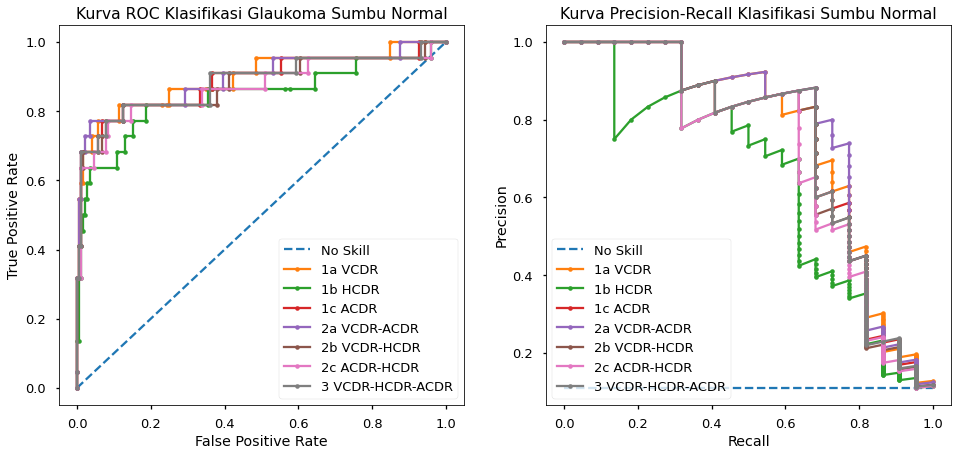


NS : ROC AUC=0.500
1a : ROC AUC=0.896
1b : ROC AUC=0.843
1c : ROC AUC=0.886
2a : ROC AUC=0.894
2b : ROC AUC=0.878
2c : ROC AUC=0.878
3  : ROC AUC=0.882

NS : PR AUC=0.111
1a : PR AUC=0.755
1b : PR AUC=0.629
1c : PR AUC=0.741
2a : PR AUC=0.767
2b : PR AUC=0.732
2c : PR AUC=0.732
3  : PR AUC=0.738


In [ ]:
# split into train/test sets
trainy_norm = y_norm[ix_tr]
valy_norm = y_norm[ix_val]
testy_norm = y_norm[ix_tes]
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(valy_norm))]

# fit a model
model1a_norm = LogisticRegression(solver='lbfgs', class_weight='balanced', C=0.001)
model1b_norm = LogisticRegression(solver='lbfgs', class_weight='balanced', C=0.001)
model1c_norm = LogisticRegression(solver='lbfgs', class_weight='balanced', C=0.1)
model2a_norm = LogisticRegression(solver='lbfgs', class_weight='balanced', C=0.001)
model2b_norm = LogisticRegression(solver='lbfgs',class_weight='balanced',  C=0.001)
model2c_norm = LogisticRegression(solver='lbfgs',class_weight='balanced',  C=0.001)
model3_norm  = LogisticRegression(solver='lbfgs', class_weight='balanced', C=0.01)

model1a_norm.fit(x1a_normGT[ix_tr], trainy_norm)
model1b_norm.fit(x1b_normGT[ix_tr], trainy_norm)
model1c_norm.fit(x1c_normGT[ix_tr], trainy_norm)
model2a_norm.fit(x2a_normGT[ix_tr], trainy_norm)
model2b_norm.fit(x2b_normGT[ix_tr], trainy_norm)
model2c_norm.fit(x2c_normGT[ix_tr], trainy_norm)
model3_norm.fit(x3_normGT[ix_tr], trainy_norm)

# predict probabilities
lr1a_probs = model1a_norm.predict_proba(x1a_normGT[ix_val])
lr1b_probs = model1b_norm.predict_proba(x1b_normGT[ix_val])
lr1c_probs = model1c_norm.predict_proba(x1c_normGT[ix_val])
lr2a_probs = model2a_norm.predict_proba(x2a_normGT[ix_val])
lr2b_probs = model2b_norm.predict_proba(x2b_normGT[ix_val])
lr2c_probs = model2c_norm.predict_proba(x2c_normGT[ix_val])
lr3_probs = model3_norm.predict_proba(x3_normGT[ix_val])

# predict class
# thd1a = threshold_pred(x_GT1a[test_ix], 0.56)
lr1a = model1a_norm.predict(x1a_normGT[ix_val])
lr1b = model1a_norm.predict(x1a_normGT[ix_val])
lr1c = model1a_norm.predict(x1a_normGT[ix_val])
lr2a = model2a_norm.predict(x2a_normGT[ix_val])
lr2b = model2b_norm.predict(x2b_normGT[ix_val])
lr2c = model2c_norm.predict(x2c_normGT[ix_val])
lr3 = model3_norm.predict(x3_normGT[ix_val])

# Calculate accuracy
# acc0a = accuracy_score(testy, thd1a)
acc1a = accuracy_score(valy_norm, lr1a)
acc1b = accuracy_score(valy_norm, lr1b)
acc1c = accuracy_score(valy_norm, lr1c)
acc2a = accuracy_score(valy_norm, lr2a)
acc2b = accuracy_score(valy_norm, lr2b)
acc2c = accuracy_score(valy_norm, lr2c)
acc3 = accuracy_score(valy_norm, lr3)

# summarize scores
# print('Threshold 1a: Acc = %.3f' % (acc0a))
print('Logistic 1a: Acc = %.3f' % (acc1a))
print('Logistic 1b: Acc = %.3f' % (acc1b))
print('Logistic 1c: Acc = %.3f' % (acc1c))
print('Logistic 2a: Acc = %.3f' % (acc2a))
print('Logistic 2b: Acc = %.3f' % (acc2b))
print('Logistic 2c: Acc = %.3f' % (acc2c))
print('Logistic 3: Acc = %.3f' % (acc3))
print()

# keep probabilities for the positive outcome only
lr1a_probs = lr1a_probs[:, 1]
lr1b_probs = lr1b_probs[:, 1]
lr1c_probs = lr1c_probs[:, 1]
lr2a_probs = lr2a_probs[:, 1]
lr2b_probs = lr2b_probs[:, 1]
lr2c_probs = lr2c_probs[:, 1]
lr3_probs = lr3_probs[:, 1]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(valy_norm, ns_probs)
lr1a_fpr, lr1a_tpr, _ = roc_curve(valy_norm, lr1a_probs)
lr1b_fpr, lr1b_tpr, _ = roc_curve(valy_norm, lr1b_probs)
lr1c_fpr, lr1c_tpr, _ = roc_curve(valy_norm, lr1c_probs)
lr2a_fpr, lr2a_tpr, _ = roc_curve(valy_norm, lr2a_probs)
lr2b_fpr, lr2b_tpr, _ = roc_curve(valy_norm, lr2b_probs)
lr2c_fpr, lr2c_tpr, _ = roc_curve(valy_norm, lr2c_probs)
lr3_fpr, lr3_tpr, _ = roc_curve(valy_norm, lr3_probs)
# cdra_fpr, cdra_tpr, _ = roc_curve(testy, x_GT1a[test_ix])

# calculate precision-recall curve
ns_precision, ns_recall, _ = precision_recall_curve(valy_norm, ns_probs)
lr1a_precision, lr1a_recall, _ = precision_recall_curve(valy_norm, lr1a_probs)
lr1b_precision, lr1b_recall, _ = precision_recall_curve(valy_norm, lr1b_probs)
lr1c_precision, lr1c_recall, _ = precision_recall_curve(valy_norm, lr1c_probs)
lr2a_precision, lr2a_recall, _ = precision_recall_curve(valy_norm, lr2a_probs)
lr2b_precision, lr2b_recall, _ = precision_recall_curve(valy_norm, lr2b_probs)
lr2c_precision, lr2c_recall, _ = precision_recall_curve(valy_norm, lr2c_probs)
lr3_precision, lr3_recall, _ = precision_recall_curve(valy_norm, lr3_probs)
# cdra_precision, cdra_recall, _ = precision_recall_curve(testy, x_GT1a[test_ix])

# calculate scores
ns_auc = roc_auc_score(valy_norm, ns_probs)
lr1a_auc = roc_auc_score(valy_norm, lr1a_probs)
lr1b_auc = roc_auc_score(valy_norm, lr1b_probs)
lr1c_auc = roc_auc_score(valy_norm, lr1c_probs)
lr2a_auc = roc_auc_score(valy_norm, lr2a_probs)
lr2b_auc = roc_auc_score(valy_norm, lr2b_probs)
lr2c_auc = roc_auc_score(valy_norm, lr2c_probs)
lr3_auc = roc_auc_score(valy_norm, lr3_probs)
# vcdra_auc = roc_auc_score(testy, x_GT1a[test_ix])

# calculate scores
no_skill = len(valy_norm[valy_norm==1]) / len(valy_norm)
lr1a_auc_pr = auc(lr1a_recall, lr1a_precision)
lr1b_auc_pr = auc(lr1b_recall, lr1b_precision)
lr1c_auc_pr = auc(lr1c_recall, lr1c_precision)
lr2a_auc_pr = auc(lr2a_recall, lr2a_precision)
lr2b_auc_pr = auc(lr2b_recall, lr2b_precision)
lr2c_auc_pr = auc(lr2c_recall, lr2c_precision)
lr3_auc_pr = auc(lr3_recall, lr3_precision)
# cdra_auc_pr = auc(cdra_recall,cdra_precision)

# plot the roc curve for the model
plt.figure(figsize=(16, 7))
plt.style.use('seaborn-talk')
plt.subplot(1,2,1),
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# plt.plot(cdra_fpr, cdra_tpr, marker='.', label='Threshold', color='darkgray')
plt.plot(lr1a_fpr, lr1a_tpr, marker='.', label='1a VCDR')
plt.plot(lr1b_fpr, lr1b_tpr, marker='.', label='1b HCDR')
plt.plot(lr1c_fpr, lr1c_tpr, marker='.', label='1c ACDR')
plt.plot(lr2a_fpr, lr2a_tpr, marker='.', label='2a VCDR-ACDR')
plt.plot(lr2b_fpr, lr2b_tpr, marker='.', label='2b VCDR-HCDR')
plt.plot(lr2c_fpr, lr2c_tpr, marker='.', label='2c ACDR-HCDR')
plt.plot(lr3_fpr, lr3_tpr, marker='.', label='3 VCDR-HCDR-ACDR')

plt.title('Kurva ROC Klasifikasi Glaukoma Sumbu Normal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# plot the PR curve for the model
plt.subplot(1,2,2),
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# plt.plot(cdra_recall, cdra_precision, marker='.', label='Threshold', color='darkgray')
plt.plot(lr1a_recall, lr1a_precision, marker='.', label='1a VCDR')
plt.plot(lr1b_recall, lr1b_precision, marker='.', label='1b HCDR')
plt.plot(lr1c_recall, lr1c_precision, marker='.', label='1c ACDR')
plt.plot(lr2a_recall, lr2a_precision, marker='.', label='2a VCDR-ACDR')
plt.plot(lr2b_recall, lr2b_precision, marker='.', label='2b VCDR-HCDR')
plt.plot(lr2c_recall, lr2c_precision, marker='.', label='2c ACDR-HCDR')
plt.plot(lr3_recall, lr3_precision, marker='.', label='3 VCDR-HCDR-ACDR')

plt.title('Kurva Precision-Recall Klasifikasi Sumbu Normal')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# summarize scores
print()
print('NS : ROC AUC=%.3f' % (ns_auc))
print('1a : ROC AUC=%.3f' % (lr1a_auc))
print('1b : ROC AUC=%.3f' % (lr1b_auc))
print('1c : ROC AUC=%.3f' % (lr1c_auc))
print('2a : ROC AUC=%.3f' % (lr2a_auc))
print('2b : ROC AUC=%.3f' % (lr2b_auc))
print('2c : ROC AUC=%.3f' % (lr2b_auc))
print('3  : ROC AUC=%.3f' % (lr3_auc))
# print('Threshold 1a: ROC AUC=%.3f' % (cdra_auc))

# summarize scores
print()
print('NS : PR AUC=%.3f' % (no_skill))
print('1a : PR AUC=%.3f' % (lr1a_auc_pr))
print('1b : PR AUC=%.3f' % (lr1b_auc_pr))
print('1c : PR AUC=%.3f' % (lr1c_auc_pr))
print('2a : PR AUC=%.3f' % (lr2a_auc_pr))
print('2b : PR AUC=%.3f' % (lr2b_auc_pr))
print('2c : PR AUC=%.3f' % (lr2b_auc_pr))
print('3  : PR AUC=%.3f' % (lr3_auc_pr))
# print('Threshold 1a: PR AUC=%.3f' % (cdra_auc_pr))

## Predict

In [ ]:
# predict probabilities
lr1a_norm_probs = model1a_norm.predict_proba(x1a_norm)
lr1b_norm_probs = model1b_norm.predict_proba(x1b_norm)
lr1c_norm_probs = model1c_norm.predict_proba(x1c_norm)
lr2a_norm_probs = model2a_norm.predict_proba(x2a_norm)
lr2b_norm_probs = model2b_norm.predict_proba(x2b_norm)
lr2c_norm_probs = model2c_norm.predict_proba(x2c_norm)
lr3_norm_probs = model3_norm.predict_proba(x3_norm)

lr1a_norm_probs = lr1a_norm_probs[:, 1]
lr1b_norm_probs = lr1b_norm_probs[:, 1]
lr1c_norm_probs = lr1c_norm_probs[:, 1]
lr2a_norm_probs = lr2a_norm_probs[:, 1]
lr2b_norm_probs = lr2b_norm_probs[:, 1]
lr2c_norm_probs = lr2c_norm_probs[:, 1]
lr3_norm_probs = lr3_norm_probs[:, 1]

# predict class
lr1a_norm = model1a_norm.predict(x1a_norm)
lr1b_norm = model1b_norm.predict(x1b_norm)
lr1c_norm = model1c_norm.predict(x1c_norm)
lr2a_norm = model2a_norm.predict(x2a_norm)
lr2b_norm = model2b_norm.predict(x2b_norm)
lr2c_norm = model2c_norm.predict(x2c_norm)
lr3_norm  = model3_norm.predict(x3_norm)

# Calculate accuracy
acc1a = accuracy_score(y_norm, lr1a_norm)
acc1b = accuracy_score(y_norm, lr1b_norm)
acc1c = accuracy_score(y_norm, lr1c_norm)
acc2a = accuracy_score(y_norm, lr2a_norm)
acc2b = accuracy_score(y_norm, lr2b_norm)
acc2c = accuracy_score(y_norm, lr2c_norm)
acc3 = accuracy_score(y_norm, lr3_norm)

# summarize scores
print('Logistic 1a VCDR          : Acc = %.3f' % (acc1a))
print('Logistic 1b HCDR          : Acc = %.3f' % (acc1b))
print('Logistic 1c ACDR          : Acc = %.3f' % (acc1c))
print('Logistic 2a VCDR-ACDR     : Acc = %.3f' % (acc2a))
print('Logistic 2b VCDR-HCDR     : Acc = %.3f' % (acc2b))
print('Logistic 2c ACDR-HCDR     : Acc = %.3f' % (acc2c))
print('Logistic 3  VCDR-HCDR-ACDR: Acc = %.3f' % (acc3))

Logistic 1a VCDR          : Acc = 0.944
Logistic 1b HCDR          : Acc = 0.889
Logistic 1c ACDR          : Acc = 0.946
Logistic 2a VCDR-ACDR     : Acc = 0.948
Logistic 2b VCDR-HCDR     : Acc = 0.941
Logistic 2c ACDR-HCDR     : Acc = 0.933
Logistic 3  VCDR-HCDR-ACDR: Acc = 0.943


In [ ]:
df_class_norm = df_feature_norm
tag_names = ['Normal', 'Glaucoma']
df_class_norm["Prediction"] = pd.Categorical.from_codes(lr2a_norm, tag_names) 
df_class_norm["Probabilities"] = lr2a_norm_probs

In [ ]:
if os.path.isfile(json_class_norm):
  os.remove(json_class_norm)
  df_class_norm.to_json (json_class_norm)
else:
  df_class_norm.to_json (json_class_norm)

## Confusion Matrix

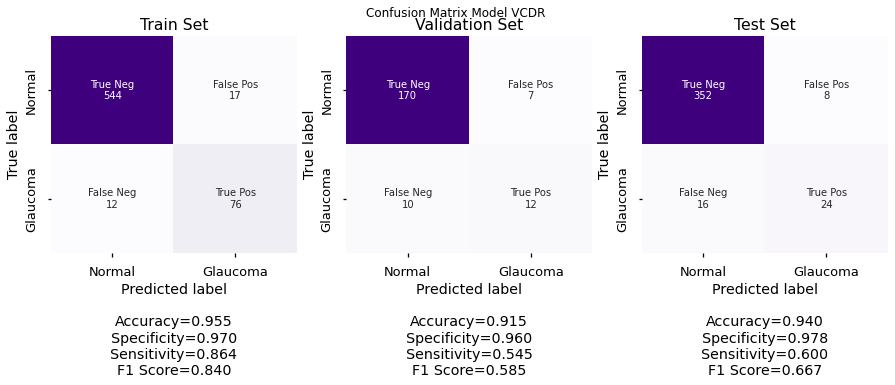

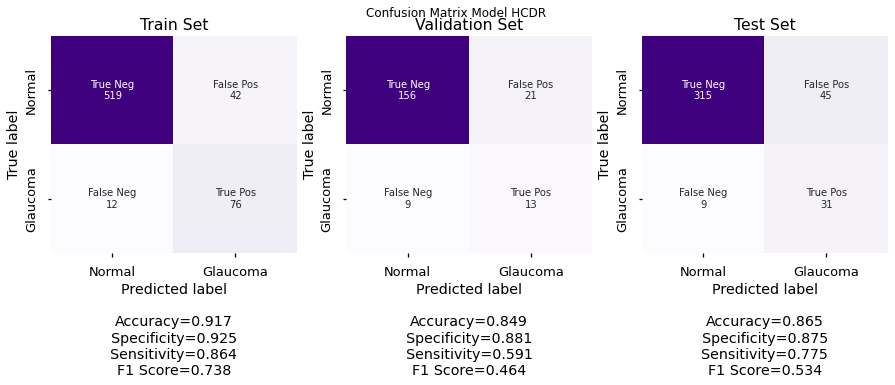

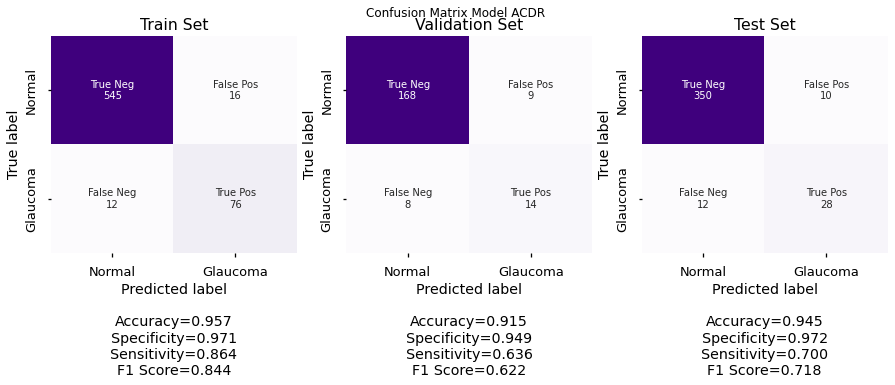

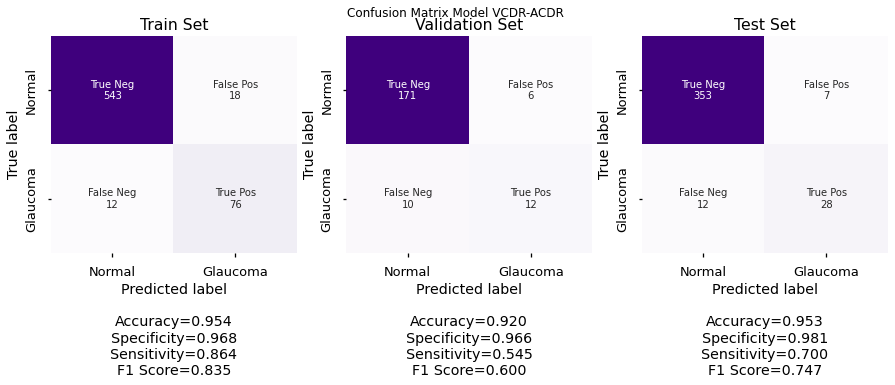

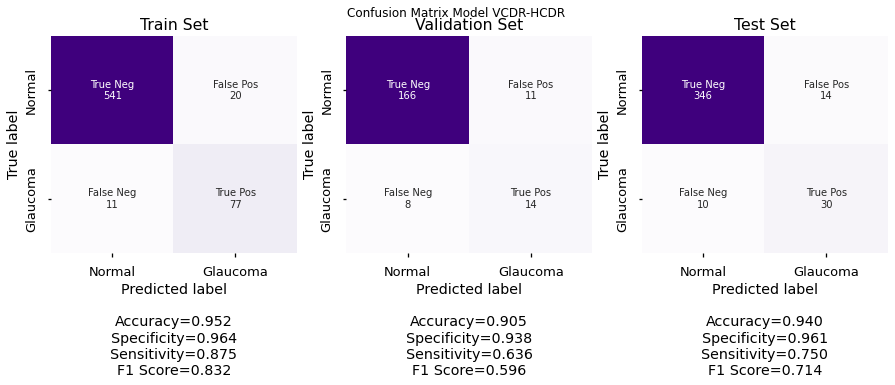

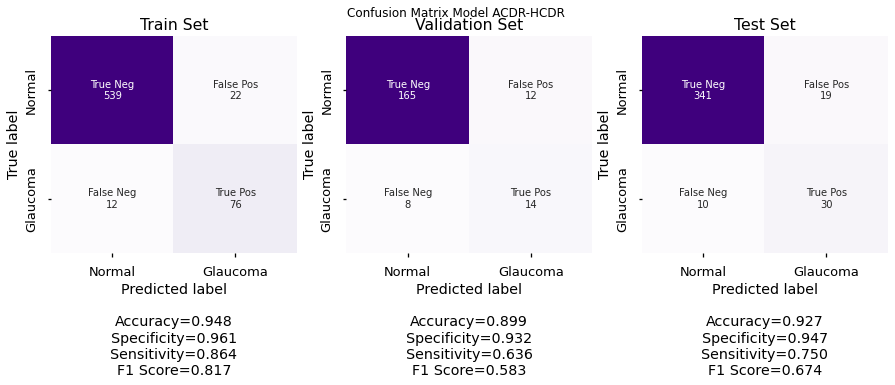

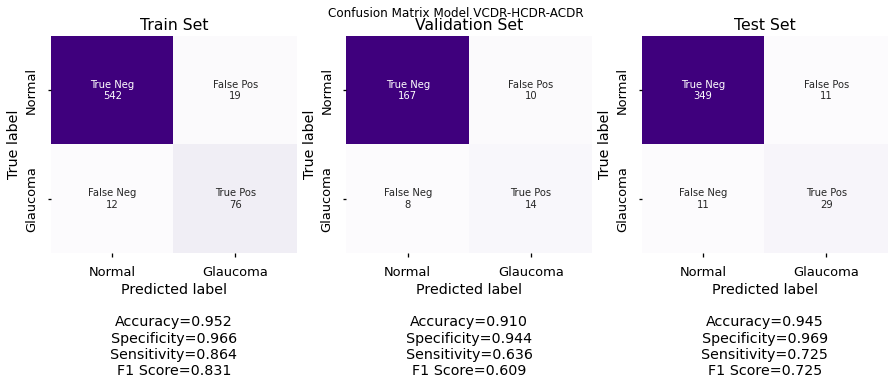

In [ ]:
ind = [ix_tr, ix_val, ix_tes]
name = ['Train Set', 'Validation Set', 'Test Set']
y_pred = [lr1a_norm, lr1b_norm, lr1c_norm, lr2a_norm, lr2b_norm, lr2c_norm, lr3_norm]
feature = ['VCDR', 'HCDR', 'ACDR', 'VCDR-ACDR', 'VCDR-HCDR', 'ACDR-HCDR', 'VCDR-HCDR-ACDR']

for i in range(len(feature)):
  title = 'Confusion Matrix Model {}'.format(feature[i])
  confMat(y_norm, y_pred[i], ind, name, title)
  print()

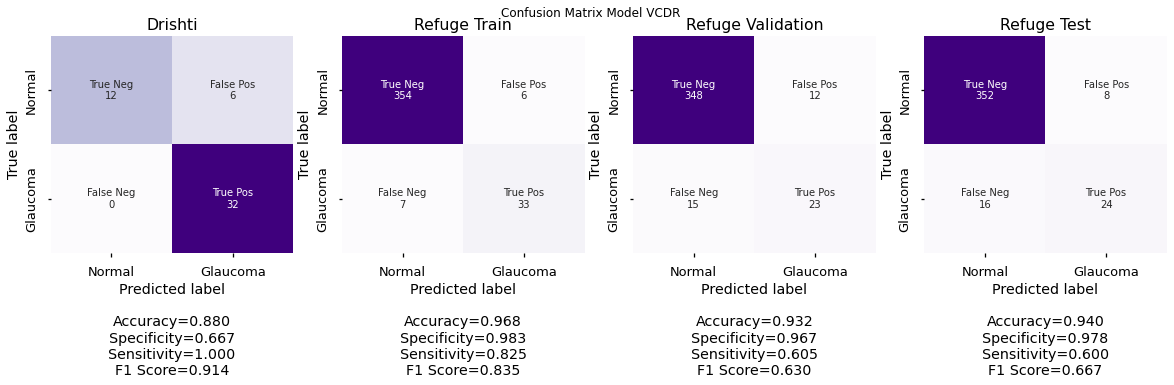

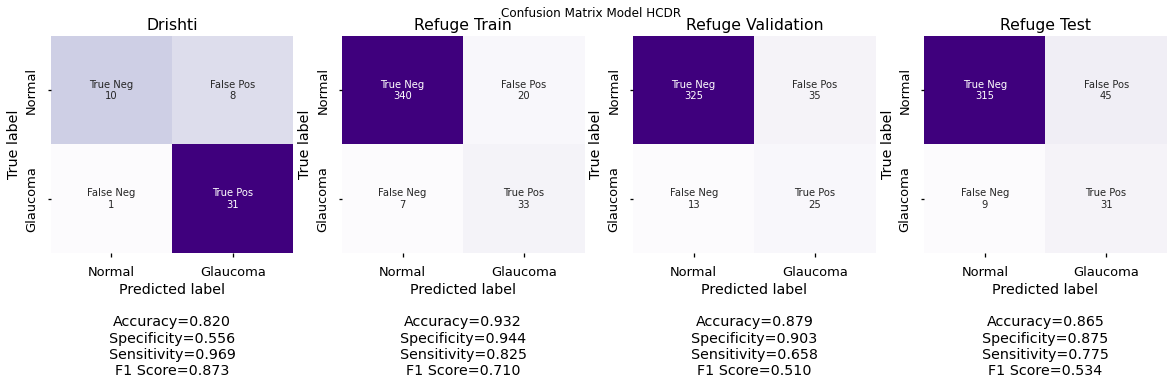

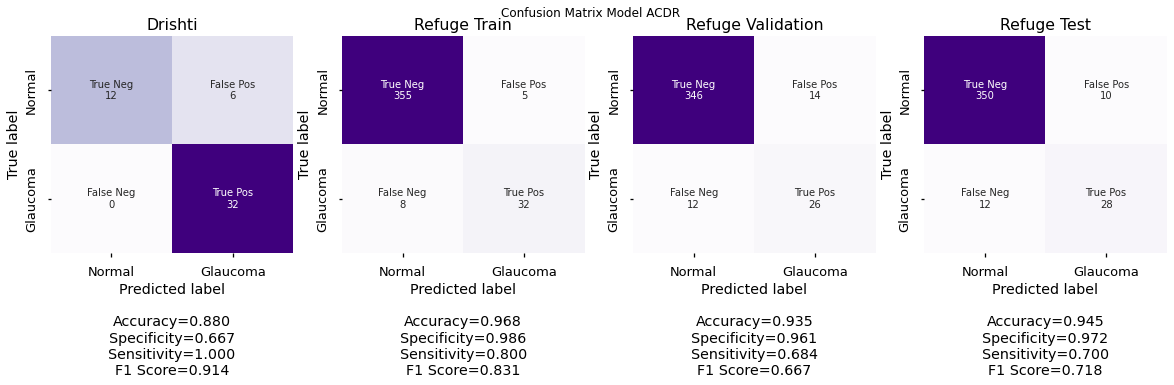

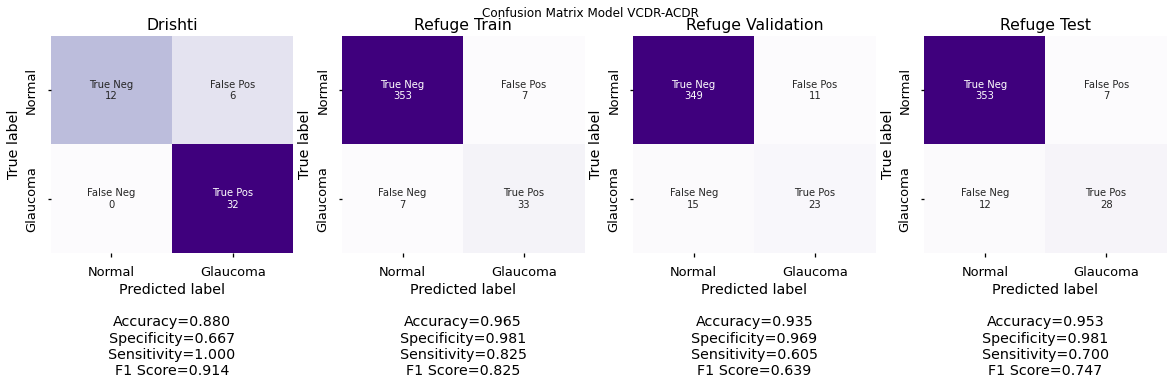

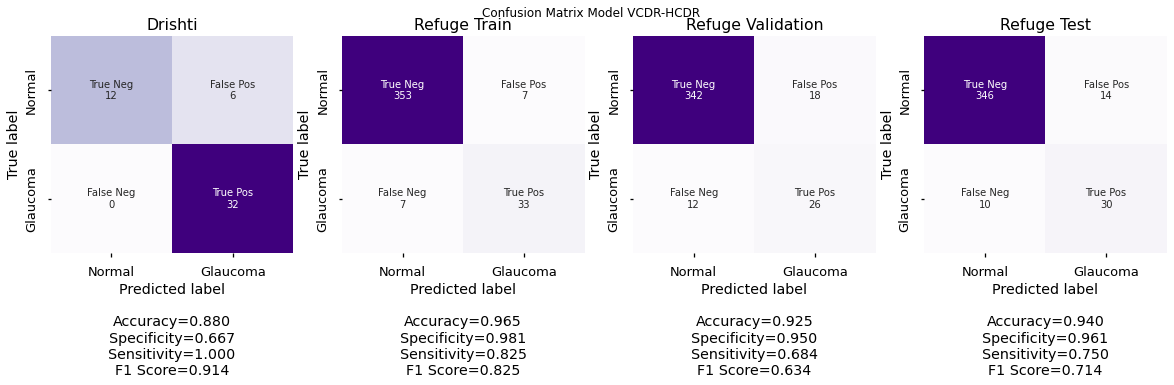

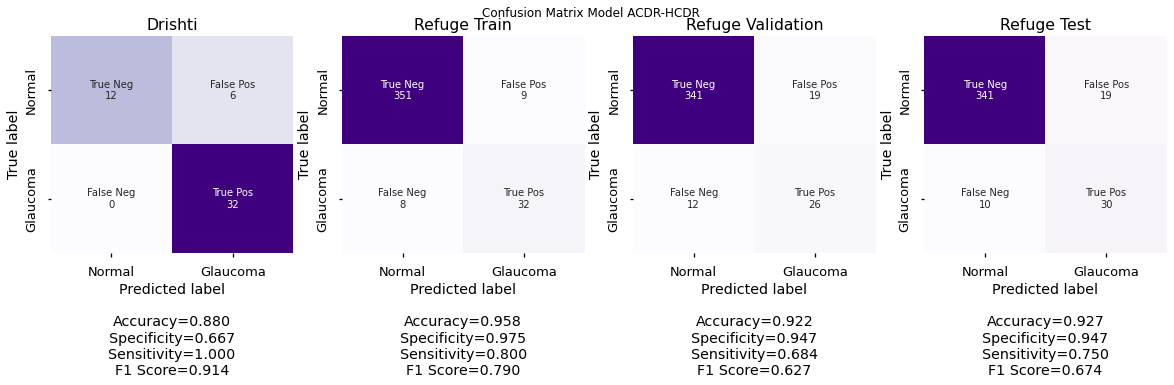

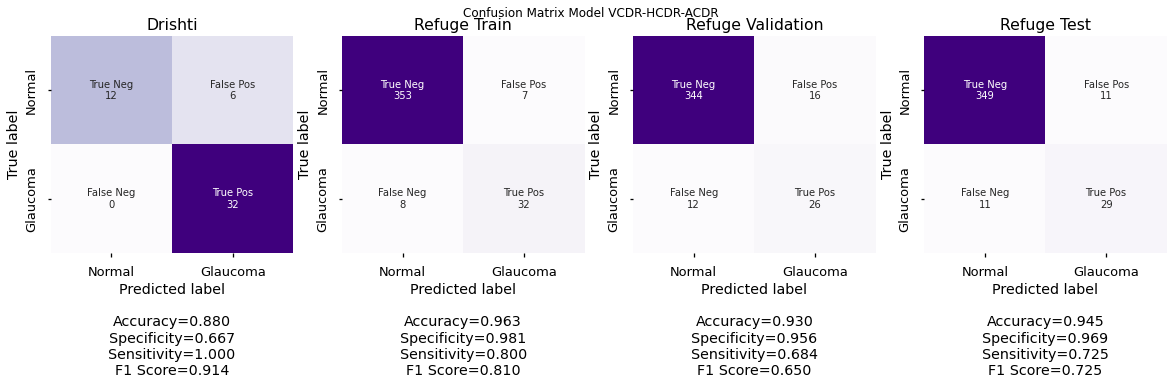

In [ ]:
ind = [ix_drishti, ix_refuge, ix_refugeval, ix_refugetest]
name = ['Drishti', 'Refuge Train', 'Refuge Validation', 'Refuge Test']
y_pred = [lr1a_norm, lr1b_norm, lr1c_norm, lr2a_norm, lr2b_norm, lr2c_norm, lr3_norm]
feature = ['VCDR', 'HCDR', 'ACDR', 'VCDR-ACDR', 'VCDR-HCDR', 'ACDR-HCDR', 'VCDR-HCDR-ACDR']

for i in range(len(feature)):
  title = 'Confusion Matrix Model {}'.format(feature[i])
  confMat(y_norm, y_pred[i], ind, name, title)
  print()

In [ ]:
print("{}\t\t\t\t{}\t{}\t{}".format("Fitur", "Acc", "Spe", "Sen"))
tab = ["\t", "\t", "\t", "", "", "", ""]
for i in range(len(y_pred)):
  cfm = confusion_matrix(y_norm[ind[0]], y_pred[i][ind[0]])
  accuracy  = np.trace(cfm) / float(np.sum(cfm))
  precision   = cfm[1,1] / sum(cfm[:,1])
  recall      = cfm[1,1] / sum(cfm[1,:])
  spe         = cfm[0,0] / sum(cfm[0,:])
  f1_score    = 2*precision*recall / (precision + recall)
  print("{} {}{}\t{:0.3f}\t{:0.3f}\t{:0.3f}".format(feature[i], "(sumbu normal)", tab[i], accuracy, spe, recall))

Fitur				Acc	Spe	Sen
VCDR (sumbu normal)		0.880	0.667	1.000
HCDR (sumbu normal)		0.820	0.556	0.969
ACDR (sumbu normal)		0.880	0.667	1.000
VCDR-ACDR (sumbu normal)	0.880	0.667	1.000
VCDR-HCDR (sumbu normal)	0.880	0.667	1.000
ACDR-HCDR (sumbu normal)	0.880	0.667	1.000
VCDR-HCDR-ACDR (sumbu normal)	0.880	0.667	1.000


# Axes Regression

## Build Model

In [ ]:
x1a_axes = df_feature_axes[['VCDR']].to_numpy()
x1b_axes = df_feature_axes[['HCDR']].to_numpy()
x1c_axes = df_feature_axes[['ACDR']].to_numpy()
x2a_axes = df_feature_axes[['VCDR', 'ACDR']].to_numpy()
x2b_axes = df_feature_axes[['VCDR', 'HCDR']].to_numpy()
x2c_axes = df_feature_axes[['ACDR', 'HCDR']].to_numpy()
x3_axes  = df_feature_axes[['VCDR', 'ACDR', 'HCDR']].to_numpy()

x1a_axesGT = df_feature_axes[['VCDR_gt']].to_numpy()
x1b_axesGT = df_feature_axes[['HCDR_gt']].to_numpy()
x1c_axesGT = df_feature_axes[['ACDR_gt']].to_numpy()
x2a_axesGT = df_feature_axes[['VCDR_gt', 'ACDR_gt']].to_numpy()
x2b_axesGT = df_feature_axes[['VCDR_gt', 'HCDR_gt']].to_numpy()
x2c_axesGT = df_feature_axes[['ACDR_gt', 'HCDR_gt']].to_numpy()
x3_axesGT  = df_feature_axes[['VCDR_gt', 'ACDR_gt', 'HCDR_gt']].to_numpy()

y_axes = df_feature_axes['tag'].to_numpy()
y_axes = encoder(y_axes)

In [ ]:
# optimasi hyperparameter
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf1a_axes = GridSearchCV(LogisticRegression(solver='lbfgs', class_weight='balanced'), param_grid)
clf1b_axes = GridSearchCV(LogisticRegression(solver='lbfgs', class_weight='balanced'), param_grid)
clf1c_axes = GridSearchCV(LogisticRegression(solver='lbfgs', class_weight='balanced'), param_grid)
clf2a_axes = GridSearchCV(LogisticRegression(solver='lbfgs', class_weight='balanced'), param_grid)
clf2b_axes = GridSearchCV(LogisticRegression(solver='lbfgs', class_weight='balanced'), param_grid)
clf2c_axes = GridSearchCV(LogisticRegression(solver='lbfgs', class_weight='balanced'), param_grid)
clf3_axes  = GridSearchCV(LogisticRegression(solver='lbfgs', class_weight='balanced'), param_grid)

clf1a_axes.fit(x1a_axesGT[ix_tr], y_axes[ix_tr])
clf1b_axes.fit(x1b_axesGT[ix_tr], y_axes[ix_tr])
clf1c_axes.fit(x1c_axesGT[ix_tr], y_axes[ix_tr])
clf2a_axes.fit(x2a_axesGT[ix_tr], y_axes[ix_tr])
clf2b_axes.fit(x2b_axesGT[ix_tr], y_axes[ix_tr])
clf2c_axes.fit(x2c_axesGT[ix_tr], y_axes[ix_tr])
clf3_axes.fit(x3_axesGT[ix_tr], y_axes[ix_tr])

print('Logistic Regression 1a: ',clf1a_axes.best_params_)
print('Logistic Regression 1b: ',clf1b_axes.best_params_)
print('Logistic Regression 1c: ',clf1c_axes.best_params_)
print('Logistic Regression 2a: ',clf2a_axes.best_params_)
print('Logistic Regression 2b: ',clf2b_axes.best_params_)
print('Logistic Regression 2c: ',clf2c_axes.best_params_)
print('Logistic Regression 3: ',clf3_axes.best_params_)

Logistic Regression 1a:  {'C': 0.001}
Logistic Regression 1b:  {'C': 0.001}
Logistic Regression 1c:  {'C': 0.1}
Logistic Regression 2a:  {'C': 0.001}
Logistic Regression 2b:  {'C': 0.001}
Logistic Regression 2c:  {'C': 0.001}
Logistic Regression 3:  {'C': 0.001}


Logistic 1a: Acc = 0.930
Logistic 1b: Acc = 0.930
Logistic 1c: Acc = 0.930
Logistic 2a: Acc = 0.950
Logistic 2b: Acc = 0.925
Logistic 2c: Acc = 0.920
Logistic 3: Acc = 0.930



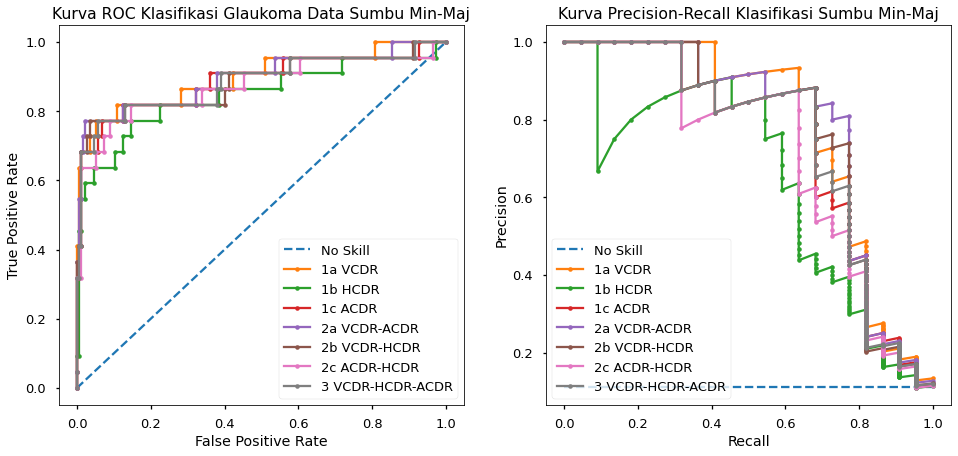


NS : ROC AUC=0.500
1a : ROC AUC=0.898
1b : ROC AUC=0.847
1c : ROC AUC=0.886
2a : ROC AUC=0.895
2b : ROC AUC=0.883
2c : ROC AUC=0.883
3  : ROC AUC=0.883

NS : PR AUC=0.111
1a : PR AUC=0.778
1b : PR AUC=0.634
1c : PR AUC=0.741
2a : PR AUC=0.777
2b : PR AUC=0.757
2c : PR AUC=0.757
3  : PR AUC=0.743


In [ ]:
# split into train/test sets
trainy_axes = y_axes[ix_tr]
valy_axes = y_axes[ix_val]
testy_axes = y_axes[ix_tes]
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(valy_axes))]

# fit a model
model1a_axes = LogisticRegression(solver='lbfgs', class_weight='balanced', C=0.001)
model1b_axes = LogisticRegression(solver='lbfgs', class_weight='balanced', C=0.001)
model1c_axes = LogisticRegression(solver='lbfgs', class_weight='balanced', C=0.1)
model2a_axes = LogisticRegression(solver='lbfgs', class_weight='balanced', C=0.001)
model2b_axes = LogisticRegression(solver='lbfgs',class_weight='balanced',  C=0.001)
model2c_axes = LogisticRegression(solver='lbfgs',class_weight='balanced',  C=0.001)
model3_axes  = LogisticRegression(solver='lbfgs', class_weight='balanced', C=0.001)

model1a_axes.fit(x1a_axesGT[ix_tr], trainy_axes)
model1b_axes.fit(x1b_axesGT[ix_tr], trainy_axes)
model1c_axes.fit(x1c_axesGT[ix_tr], trainy_axes)
model2a_axes.fit(x2a_axesGT[ix_tr], trainy_axes)
model2b_axes.fit(x2b_axesGT[ix_tr], trainy_axes)
model2c_axes.fit(x2c_axesGT[ix_tr], trainy_axes)
model3_axes.fit(x3_axesGT[ix_tr], trainy_axes)

# predict probabilities
lr1a_probs = model1a_axes.predict_proba(x1a_axesGT[ix_val])
lr1b_probs = model1b_axes.predict_proba(x1b_axesGT[ix_val])
lr1c_probs = model1c_axes.predict_proba(x1c_axesGT[ix_val])
lr2a_probs = model2a_axes.predict_proba(x2a_axesGT[ix_val])
lr2b_probs = model2b_axes.predict_proba(x2b_axesGT[ix_val])
lr2c_probs = model2c_axes.predict_proba(x2c_axesGT[ix_val])
lr3_probs = model3_axes.predict_proba(x3_axesGT[ix_val])
# predict class

# thd1a = threshold_pred(x_GT1a[test_ix], 0.56)
lr1a = model1a_axes.predict(x1a_axesGT[ix_val])
lr1b = model1a_axes.predict(x1a_axesGT[ix_val])
lr1c = model1a_axes.predict(x1a_axesGT[ix_val])
lr2a = model2a_axes.predict(x2a_axesGT[ix_val])
lr2b = model2b_axes.predict(x2b_axesGT[ix_val])
lr2c = model2c_axes.predict(x2c_axesGT[ix_val])
lr3 = model3_axes.predict(x3_axesGT[ix_val])

# Calculate accuracy
# acc0a = accuracy_score(testy, thd1a)
acc1a = accuracy_score(valy_axes, lr1a)
acc1b = accuracy_score(valy_axes, lr1b)
acc1c = accuracy_score(valy_axes, lr1c)
acc2a = accuracy_score(valy_axes, lr2a)
acc2b = accuracy_score(valy_axes, lr2b)
acc2c = accuracy_score(valy_axes, lr2c)
acc3 = accuracy_score(valy_axes, lr3)

# summarize scores
# print('Threshold 1a: Acc = %.3f' % (acc0a))
print('Logistic 1a: Acc = %.3f' % (acc1a))
print('Logistic 1b: Acc = %.3f' % (acc1b))
print('Logistic 1c: Acc = %.3f' % (acc1c))
print('Logistic 2a: Acc = %.3f' % (acc2a))
print('Logistic 2b: Acc = %.3f' % (acc2b))
print('Logistic 2c: Acc = %.3f' % (acc2c))
print('Logistic 3: Acc = %.3f' % (acc3))
print()

# keep probabilities for the positive outcome only
lr1a_probs = lr1a_probs[:, 1]
lr1b_probs = lr1b_probs[:, 1]
lr1c_probs = lr1c_probs[:, 1]
lr2a_probs = lr2a_probs[:, 1]
lr2b_probs = lr2b_probs[:, 1]
lr2c_probs = lr2c_probs[:, 1]
lr3_probs = lr3_probs[:, 1]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(valy_axes, ns_probs)
lr1a_fpr, lr1a_tpr, _ = roc_curve(valy_axes, lr1a_probs)
lr1b_fpr, lr1b_tpr, _ = roc_curve(valy_axes, lr1b_probs)
lr1c_fpr, lr1c_tpr, _ = roc_curve(valy_axes, lr1c_probs)
lr2a_fpr, lr2a_tpr, _ = roc_curve(valy_axes, lr2a_probs)
lr2b_fpr, lr2b_tpr, _ = roc_curve(valy_axes, lr2b_probs)
lr2c_fpr, lr2c_tpr, _ = roc_curve(valy_axes, lr2c_probs)
lr3_fpr, lr3_tpr, _ = roc_curve(valy_axes, lr3_probs)
# cdra_fpr, cdra_tpr, _ = roc_curve(testy, x_GT1a[test_ix])

# calculate precision-recall curve
ns_precision, ns_recall, _ = precision_recall_curve(valy_axes, ns_probs)
lr1a_precision, lr1a_recall, _ = precision_recall_curve(valy_axes, lr1a_probs)
lr1b_precision, lr1b_recall, _ = precision_recall_curve(valy_axes, lr1b_probs)
lr1c_precision, lr1c_recall, _ = precision_recall_curve(valy_axes, lr1c_probs)
lr2a_precision, lr2a_recall, _ = precision_recall_curve(valy_axes, lr2a_probs)
lr2b_precision, lr2b_recall, _ = precision_recall_curve(valy_axes, lr2b_probs)
lr2c_precision, lr2c_recall, _ = precision_recall_curve(valy_axes, lr2c_probs)
lr3_precision, lr3_recall, _ = precision_recall_curve(valy_axes, lr3_probs)
# cdra_precision, cdra_recall, _ = precision_recall_curve(testy, x_GT1a[test_ix])

# calculate scores
ns_auc = roc_auc_score(valy_axes, ns_probs)
lr1a_auc = roc_auc_score(valy_axes, lr1a_probs)
lr1b_auc = roc_auc_score(valy_axes, lr1b_probs)
lr1c_auc = roc_auc_score(valy_axes, lr1c_probs)
lr2a_auc = roc_auc_score(valy_axes, lr2a_probs)
lr2b_auc = roc_auc_score(valy_axes, lr2b_probs)
lr2c_auc = roc_auc_score(valy_axes, lr2c_probs)
lr3_auc = roc_auc_score(valy_axes, lr3_probs)
# vcdra_auc = roc_auc_score(testy, x_GT1a[test_ix])

# calculate scores
no_skill = len(valy_axes[valy_axes==1]) / len(valy_axes)
lr1a_auc_pr = auc(lr1a_recall, lr1a_precision)
lr1b_auc_pr = auc(lr1b_recall, lr1b_precision)
lr1c_auc_pr = auc(lr1c_recall, lr1c_precision)
lr2a_auc_pr = auc(lr2a_recall, lr2a_precision)
lr2b_auc_pr = auc(lr2b_recall, lr2b_precision)
lr2c_auc_pr = auc(lr2c_recall, lr2c_precision)
lr3_auc_pr = auc(lr3_recall, lr3_precision)
# cdra_auc_pr = auc(cdra_recall,cdra_precision)

# plot the roc curve for the model
plt.figure(figsize=(16, 7))
plt.style.use('seaborn-talk')
plt.subplot(1,2,1),
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# plt.plot(cdra_fpr, cdra_tpr, marker='.', label='Threshold', color='darkgray')
plt.plot(lr1a_fpr, lr1a_tpr, marker='.', label='1a VCDR')
plt.plot(lr1b_fpr, lr1b_tpr, marker='.', label='1b HCDR')
plt.plot(lr1c_fpr, lr1c_tpr, marker='.', label='1c ACDR')
plt.plot(lr2a_fpr, lr2a_tpr, marker='.', label='2a VCDR-ACDR')
plt.plot(lr2b_fpr, lr2b_tpr, marker='.', label='2b VCDR-HCDR')
plt.plot(lr2c_fpr, lr2c_tpr, marker='.', label='2c ACDR-HCDR')
plt.plot(lr3_fpr, lr3_tpr, marker='.', label='3 VCDR-HCDR-ACDR')

plt.title('Kurva ROC Klasifikasi Glaukoma Data Sumbu Min-Maj')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# plot the PR curve for the model
plt.subplot(1,2,2),
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# plt.plot(cdra_recall, cdra_precision, marker='.', label='Threshold', color='darkgray')
plt.plot(lr1a_recall, lr1a_precision, marker='.', label='1a VCDR')
plt.plot(lr1b_recall, lr1b_precision, marker='.', label='1b HCDR')
plt.plot(lr1c_recall, lr1c_precision, marker='.', label='1c ACDR')
plt.plot(lr2a_recall, lr2a_precision, marker='.', label='2a VCDR-ACDR')
plt.plot(lr2b_recall, lr2b_precision, marker='.', label='2b VCDR-HCDR')
plt.plot(lr2c_recall, lr2c_precision, marker='.', label='2c ACDR-HCDR')
plt.plot(lr3_recall, lr3_precision, marker='.', label='3 VCDR-HCDR-ACDR')

plt.title('Kurva Precision-Recall Klasifikasi Sumbu Min-Maj')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# summarize scores
print()
print('NS : ROC AUC=%.3f' % (ns_auc))
print('1a : ROC AUC=%.3f' % (lr1a_auc))
print('1b : ROC AUC=%.3f' % (lr1b_auc))
print('1c : ROC AUC=%.3f' % (lr1c_auc))
print('2a : ROC AUC=%.3f' % (lr2a_auc))
print('2b : ROC AUC=%.3f' % (lr2b_auc))
print('2c : ROC AUC=%.3f' % (lr2b_auc))
print('3  : ROC AUC=%.3f' % (lr3_auc))
# print('Threshold 1a: ROC AUC=%.3f' % (cdra_auc))

# summarize scores
print()
print('NS : PR AUC=%.3f' % (no_skill))
print('1a : PR AUC=%.3f' % (lr1a_auc_pr))
print('1b : PR AUC=%.3f' % (lr1b_auc_pr))
print('1c : PR AUC=%.3f' % (lr1c_auc_pr))
print('2a : PR AUC=%.3f' % (lr2a_auc_pr))
print('2b : PR AUC=%.3f' % (lr2b_auc_pr))
print('2c : PR AUC=%.3f' % (lr2b_auc_pr))
print('3  : PR AUC=%.3f' % (lr3_auc_pr))
# print('Threshold 1a: PR AUC=%.3f' % (cdra_auc_pr))

## Predict

In [ ]:
# predict probabilities
lr1a_axes_probs = model1a_axes.predict_proba(x1a_axes)
lr1b_axes_probs = model1b_axes.predict_proba(x1b_axes)
lr1c_axes_probs = model1c_axes.predict_proba(x1c_axes)
lr2a_axes_probs = model2a_axes.predict_proba(x2a_axes)
lr2b_axes_probs = model2b_axes.predict_proba(x2b_axes)
lr2c_axes_probs = model2c_axes.predict_proba(x2c_axes)
lr3_axes_probs = model3_axes.predict_proba(x3_axes)

lr1a_axes_probs = lr1a_axes_probs[:, 1]
lr1b_axes_probs = lr1b_axes_probs[:, 1]
lr1c_axes_probs = lr1c_axes_probs[:, 1]
lr2a_axes_probs = lr2a_axes_probs[:, 1]
lr2b_axes_probs = lr2b_axes_probs[:, 1]
lr2c_axes_probs = lr2c_axes_probs[:, 1]
lr3_axes_probs = lr3_axes_probs[:, 1]

# predict class
lr1a_axes = model1a_axes.predict(x1a_axes)
lr1b_axes = model1b_axes.predict(x1b_axes)
lr1c_axes = model1c_axes.predict(x1c_axes)
lr2a_axes = model2a_axes.predict(x2a_axes)
lr2b_axes = model2b_axes.predict(x2b_axes)
lr2c_axes = model2c_axes.predict(x2c_axes)
lr3_axes  = model3_axes.predict(x3_axes)

lr1a_axesGT = model1a_axes.predict(x1a_axesGT)
lr1b_axesGT = model1b_axes.predict(x1b_axesGT)
lr1c_axesGT = model1c_axes.predict(x1c_axesGT)
lr2a_axesGT = model2a_axes.predict(x2a_axesGT)
lr2b_axesGT = model2b_axes.predict(x2b_axesGT)
lr2c_axesGT = model2c_axes.predict(x2c_axesGT)
lr3_axesGT  = model3_axes.predict(x3_axesGT)

# Calculate accuracy
acc1a = accuracy_score(y_axes, lr1a_axes)
acc1b = accuracy_score(y_axes, lr1b_axes)
acc1c = accuracy_score(y_axes, lr1c_axes)
acc2a = accuracy_score(y_axes, lr2a_axes)
acc2b = accuracy_score(y_axes, lr2b_axes)
acc2c = accuracy_score(y_axes, lr2c_axes)
acc3 = accuracy_score(y_axes, lr3_axes)

# summarize scores
print('Logistic 1a VCDR          : Acc = %.3f' % (acc1a))
print('Logistic 1b HCDR          : Acc = %.3f' % (acc1b))
print('Logistic 1c ACDR          : Acc = %.3f' % (acc1c))
print('Logistic 2a VCDR-ACDR     : Acc = %.3f' % (acc2a))
print('Logistic 2b VCDR-HCDR     : Acc = %.3f' % (acc2b))
print('Logistic 2c ACDR-HCDR     : Acc = %.3f' % (acc2c))
print('Logistic 3  VCDR-HCDR-ACDR: Acc = %.3f' % (acc3))

Logistic 1a VCDR          : Acc = 0.946
Logistic 1b HCDR          : Acc = 0.893
Logistic 1c ACDR          : Acc = 0.946
Logistic 2a VCDR-ACDR     : Acc = 0.951
Logistic 2b VCDR-HCDR     : Acc = 0.939
Logistic 2c ACDR-HCDR     : Acc = 0.933
Logistic 3  VCDR-HCDR-ACDR: Acc = 0.942


In [ ]:
df_class_axes = df_feature_axes
tag_names = ['Normal', 'Glaucoma']
df_class_axes["Prediction"] = pd.Categorical.from_codes(lr2a_axes, tag_names)
df_class_axes["Prediction_gt"] = pd.Categorical.from_codes(lr2a_axesGT, tag_names) 
df_class_axes["Probabilities"] = lr2a_axes_probs

In [ ]:
if os.path.isfile(json_class_axes):
  os.remove(json_class_axes)
  df_class_axes.to_json (json_class_axes)
else:
  df_class_axes.to_json (json_class_axes)

## Confusion Matrix

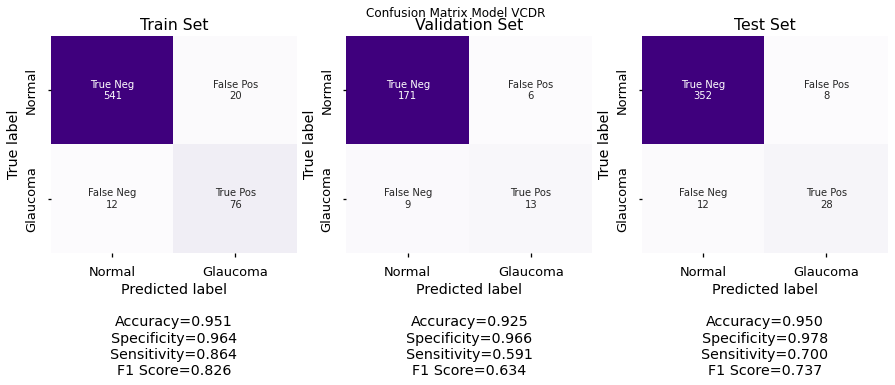

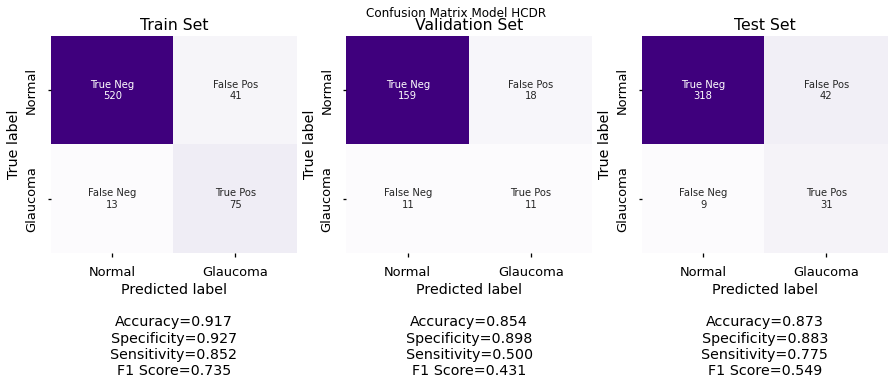

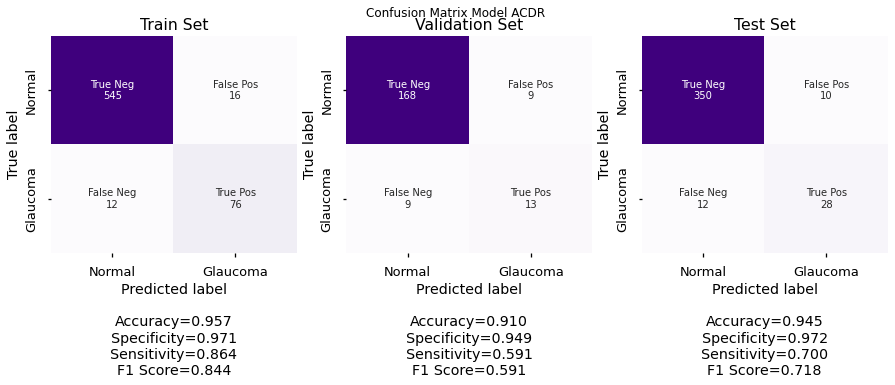

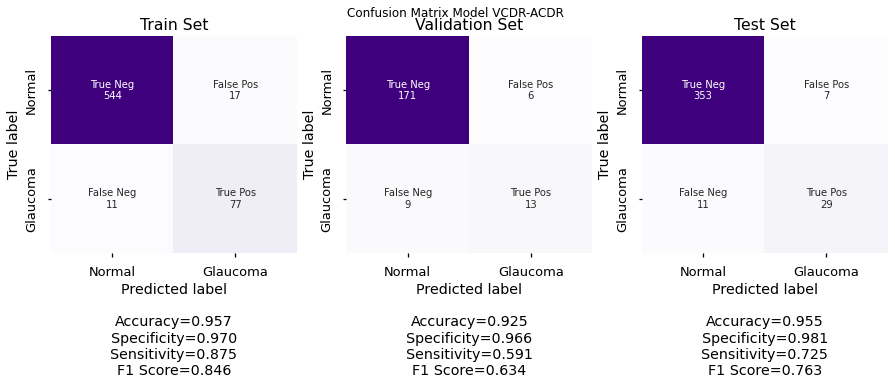

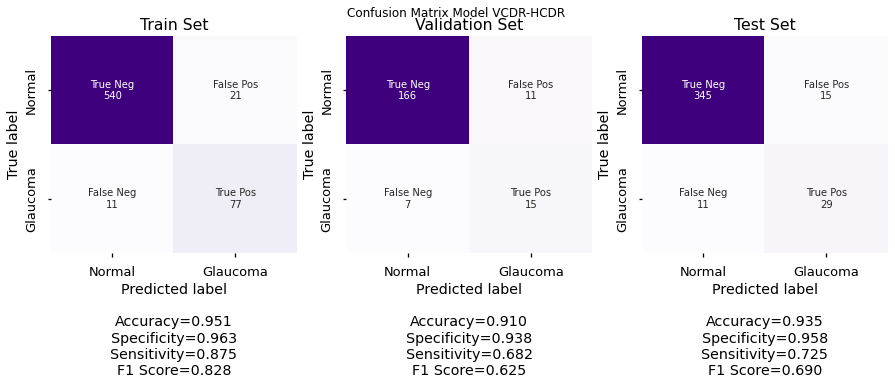

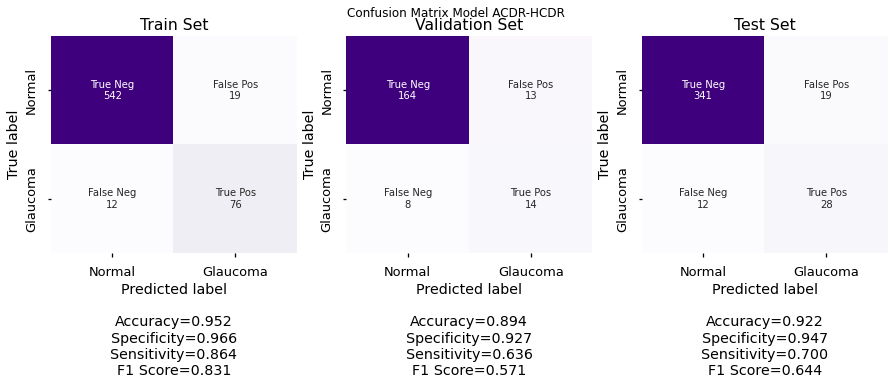

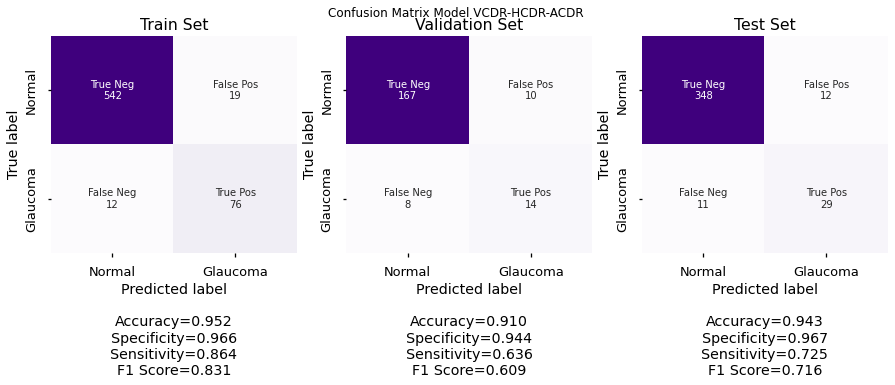

In [ ]:
ind = [ix_tr, ix_val, ix_tes]
name = ['Train Set', 'Validation Set', 'Test Set']
y_pred = [lr1a_axes, lr1b_axes, lr1c_axes, lr2a_axes, lr2b_axes, lr2c_axes, lr3_axes]
feature = ['VCDR', 'HCDR', 'ACDR', 'VCDR-ACDR', 'VCDR-HCDR', 'ACDR-HCDR', 'VCDR-HCDR-ACDR']

for i in range(len(feature)):
  title = 'Confusion Matrix Model {}'.format(feature[i])
  confMat(y_axes, y_pred[i], ind, name, title)
  print()

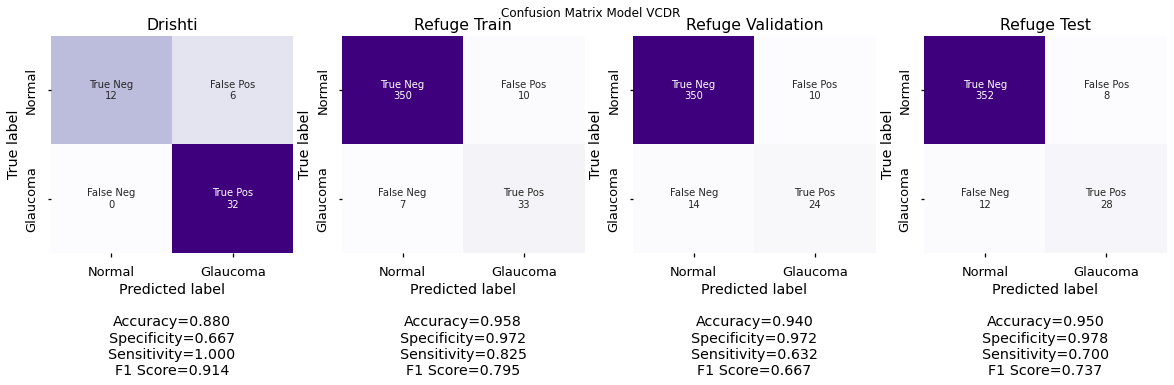

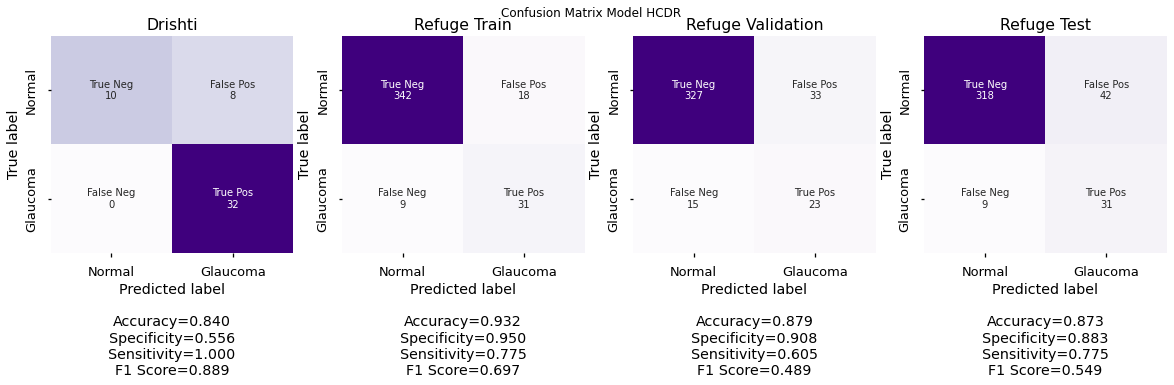

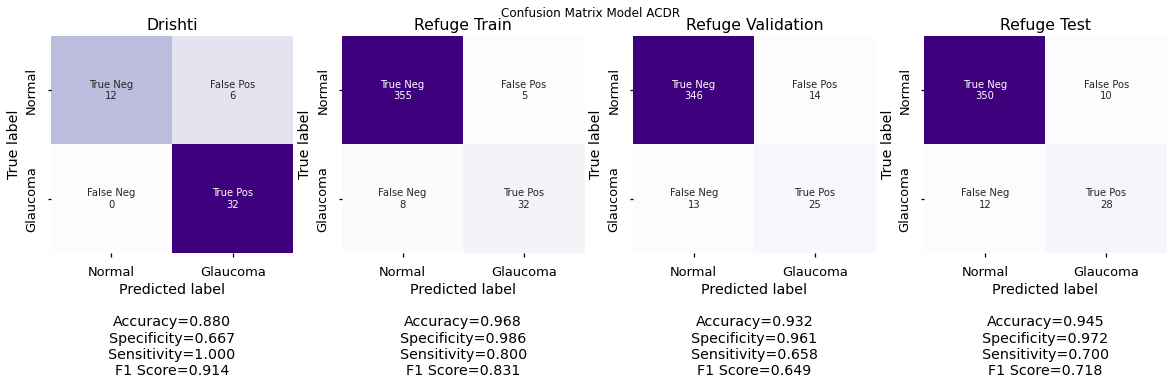

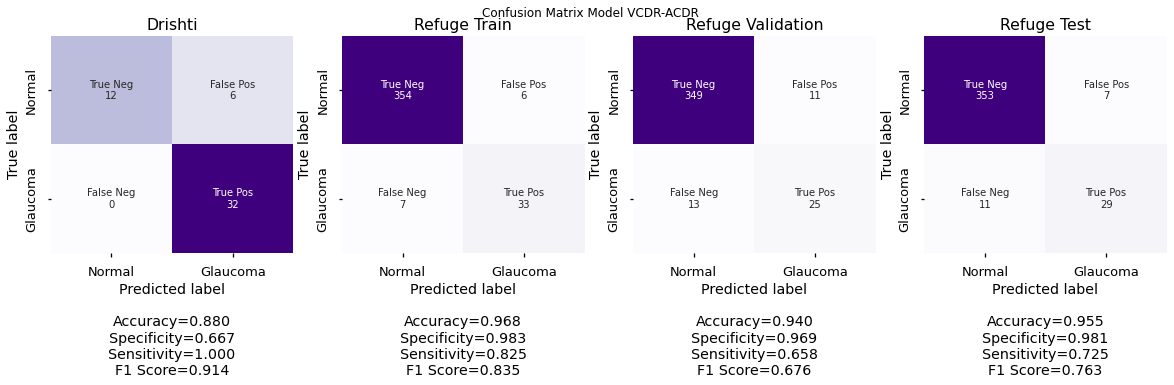

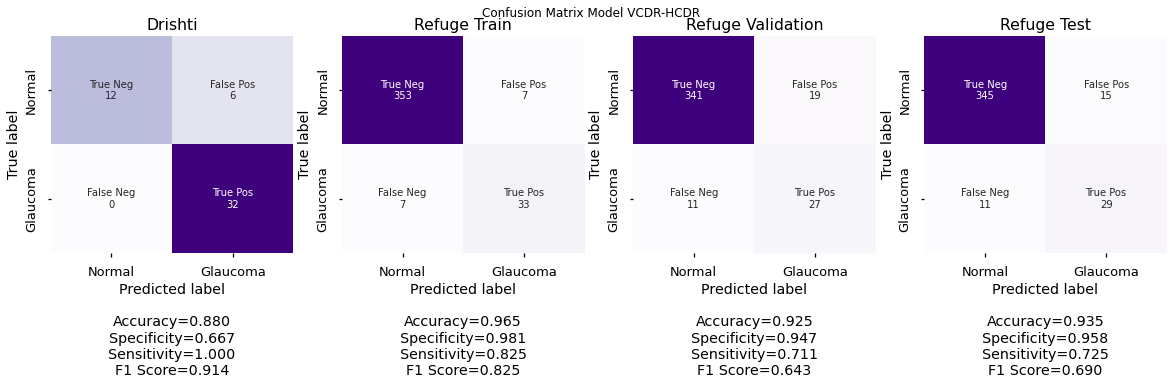

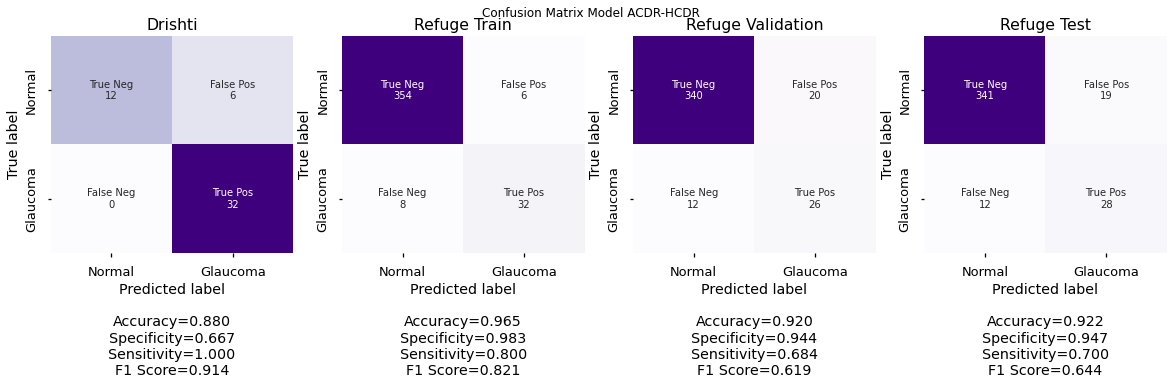

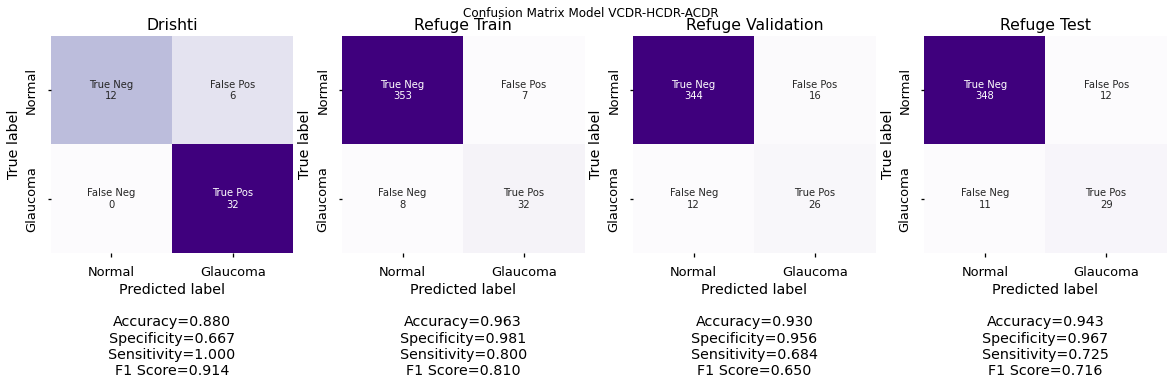

In [ ]:
ind = [ix_drishti, ix_refuge, ix_refugeval, ix_refugetest]
name = ['Drishti', 'Refuge Train', 'Refuge Validation', 'Refuge Test']
y_pred = [lr1a_axes, lr1b_axes, lr1c_axes, lr2a_axes, lr2b_axes, lr2c_axes, lr3_axes]
feature = ['VCDR', 'HCDR', 'ACDR', 'VCDR-ACDR', 'VCDR-HCDR', 'ACDR-HCDR', 'VCDR-HCDR-ACDR']

for i in range(len(feature)):
  title = 'Confusion Matrix Model {}'.format(feature[i])
  confMat(y_axes, y_pred[i], ind, name, title)
  print()

In [ ]:
print("{}\t\t\t\t{}\t{}\t{}".format("Fitur", "Acc", "Spe", "Sen"))
tab = ["\t", "\t", "\t", "", "", "", ""]
for i in range(len(y_pred)):
  cfm = confusion_matrix(y_norm[ind[0]], y_pred[i][ind[0]])
  accuracy  = np.trace(cfm) / float(np.sum(cfm))
  precision   = cfm[1,1] / sum(cfm[:,1])
  recall      = cfm[1,1] / sum(cfm[1,:])
  spe         = cfm[0,0] / sum(cfm[0,:])
  f1_score    = 2*precision*recall / (precision + recall)
  print("{} {}{}\t{:0.3f}\t{:0.3f}\t{:0.3f}".format(feature[i], "(Sumbu Min-Maj)", tab[i], accuracy, spe, recall))

Fitur				Acc	Spe	Sen
VCDR (Sumbu Min-Maj)		0.880	0.667	1.000
HCDR (Sumbu Min-Maj)		0.840	0.556	1.000
ACDR (Sumbu Min-Maj)		0.880	0.667	1.000
VCDR-ACDR (Sumbu Min-Maj)	0.880	0.667	1.000
VCDR-HCDR (Sumbu Min-Maj)	0.880	0.667	1.000
ACDR-HCDR (Sumbu Min-Maj)	0.880	0.667	1.000
VCDR-HCDR-ACDR (Sumbu Min-Maj)	0.880	0.667	1.000


# Rim Regression

## Build Model

In [ ]:
x_rim = df_feature_rim[['RDR']].to_numpy()

x_rimGT = df_feature_rim[['RDR_gt']].to_numpy()

y_rim = df_feature_rim['tag'].to_numpy()
y_rim = encoder(y_rim)

In [ ]:
# optimasi hyperparameter
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf_rim = GridSearchCV(LogisticRegression(solver='lbfgs', class_weight='balanced'), param_grid)

clf_rim.fit(x_rimGT[ix_tr], y_rim[ix_tr])

print('Logistic RDR : ',clf_rim.best_params_)

Logistic RDR :  {'C': 0.001}


Logistic RDR : Acc = 0.804



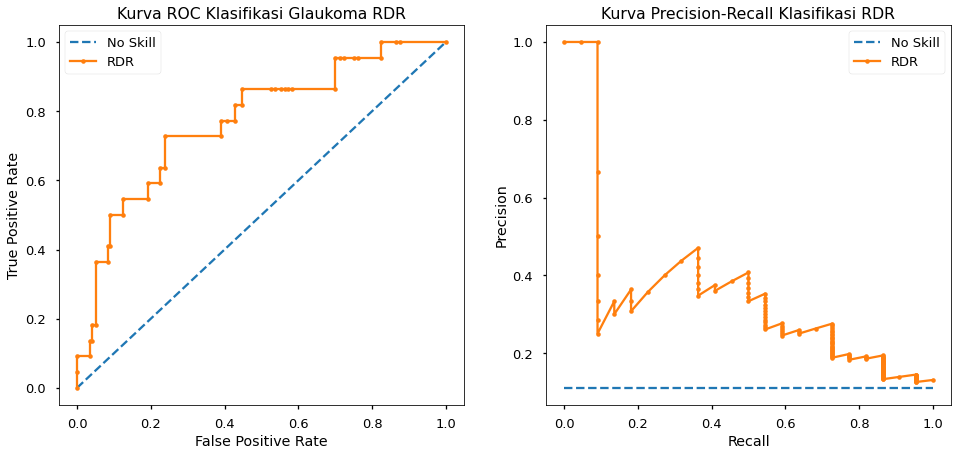


NS : ROC AUC=0.500
RDR: ROC AUC=0.770

NS : PR AUC=0.111
RDR: PR AUC=0.350


In [ ]:
# split into train/test sets
trainy_rim = y_axes[ix_tr]
valy_rim = y_axes[ix_val]
testy_rim = y_axes[ix_tes]
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(valy_rim))]

# fit a model
model_rim = LogisticRegression(solver='lbfgs', class_weight='balanced', C=0.001)
model_rim.fit(x_rimGT[ix_tr], trainy_rim)

# predict probabilities
lr_probs = model_rim.predict_proba(x_rimGT[ix_val])
# predict class

# thd1a = threshold_pred(x_GT1a[test_ix], 0.56)
lr = model_rim.predict(x_rimGT[ix_val])

# Calculate accuracy
# acc0a = accuracy_score(testy, thd1a)
acc = accuracy_score(valy_axes, lr)

# summarize scores
# print('Threshold 1a: Acc = %.3f' % (acc0a))
print('Logistic RDR : Acc = %.3f' % (acc))
print()

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(valy_rim, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(valy_rim, lr_probs)
# cdra_fpr, cdra_tpr, _ = roc_curve(testy, x_GT1a[test_ix])

# calculate precision-recall curve
ns_precision, ns_recall, _ = precision_recall_curve(valy_rim, ns_probs)
lr_precision, lr_recall, _ = precision_recall_curve(valy_rim, lr_probs)
# cdra_precision, cdra_recall, _ = precision_recall_curve(testy, x_GT1a[test_ix])

# calculate scores
ns_auc = roc_auc_score(valy_rim, ns_probs)
lr_auc = roc_auc_score(valy_rim, lr_probs)
# vcdra_auc = roc_auc_score(testy, x_GT1a[test_ix])

# calculate scores
no_skill = len(valy_rim[valy_rim==1]) / len(valy_rim)
lr_auc_pr = auc(lr_recall, lr_precision)
# cdra_auc_pr = auc(cdra_recall,cdra_precision)

# plot the roc curve for the model
plt.figure(figsize=(16, 7))
plt.style.use('seaborn-talk')
plt.subplot(1,2,1),
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# plt.plot(cdra_fpr, cdra_tpr, marker='.', label='Threshold', color='darkgray')
plt.plot(lr_fpr, lr_tpr, marker='.', label='RDR')

plt.title('Kurva ROC Klasifikasi Glaukoma RDR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# plot the PR curve for the model
plt.subplot(1,2,2),
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# plt.plot(cdra_recall, cdra_precision, marker='.', label='Threshold', color='darkgray')
plt.plot(lr_recall, lr_precision, marker='.', label='RDR')

plt.title('Kurva Precision-Recall Klasifikasi RDR')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# summarize scores
print()
print('NS : ROC AUC=%.3f' % (ns_auc))
print('RDR: ROC AUC=%.3f' % (lr_auc))
# print('Threshold 1a: ROC AUC=%.3f' % (cdra_auc))

# summarize scores
print()
print('NS : PR AUC=%.3f' % (no_skill))
print('RDR: PR AUC=%.3f' % (lr_auc_pr))
# print('Threshold 1a: PR AUC=%.3f' % (cdra_auc_pr))

## Predict

In [ ]:
lr_rim_probs = model_rim.predict_proba(x_rim)
lr_rim_probs = lr_rim_probs[:, 1]

# predict class
lr_rim = model_rim.predict(x_rim)

# Calculate accuracy
acc = accuracy_score(y_rim, lr_rim)

# summarize scores
print('Logistic RDR         : Acc = %.3f' % (acc))

Logistic RDR         : Acc = 0.858


In [ ]:
df_class_rim = df_feature_rim
tag_names = ['Normal', 'Glaucoma']
df_class_rim["Prediction"] = pd.Categorical.from_codes(lr_rim, tag_names) 
df_class_rim["Probabilities"] = lr_rim_probs

In [ ]:
if os.path.isfile(json_class_rim):
  os.remove(json_class_rim)
  df_class_rim.to_json (json_class_rim)
else:
  df_class_rim.to_json (json_class_rim)

## Confusion Matrix

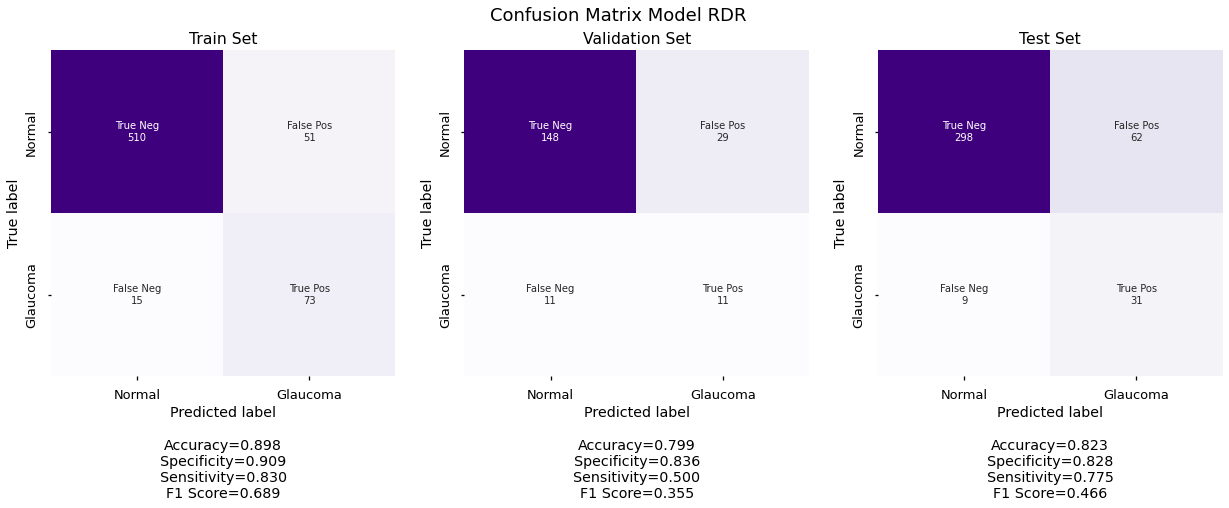

In [ ]:
ind = [ix_tr, ix_val, ix_tes]
name = ['Train Set', 'Validation Set', 'Test Set']
y_pred = [lr_rim]
feature = ['RDR']

for i in range(len(feature)):
  title = 'Confusion Matrix Model {}'.format(feature[i])
  confMat(y_rim, y_pred[i], ind, name, title)
  print()

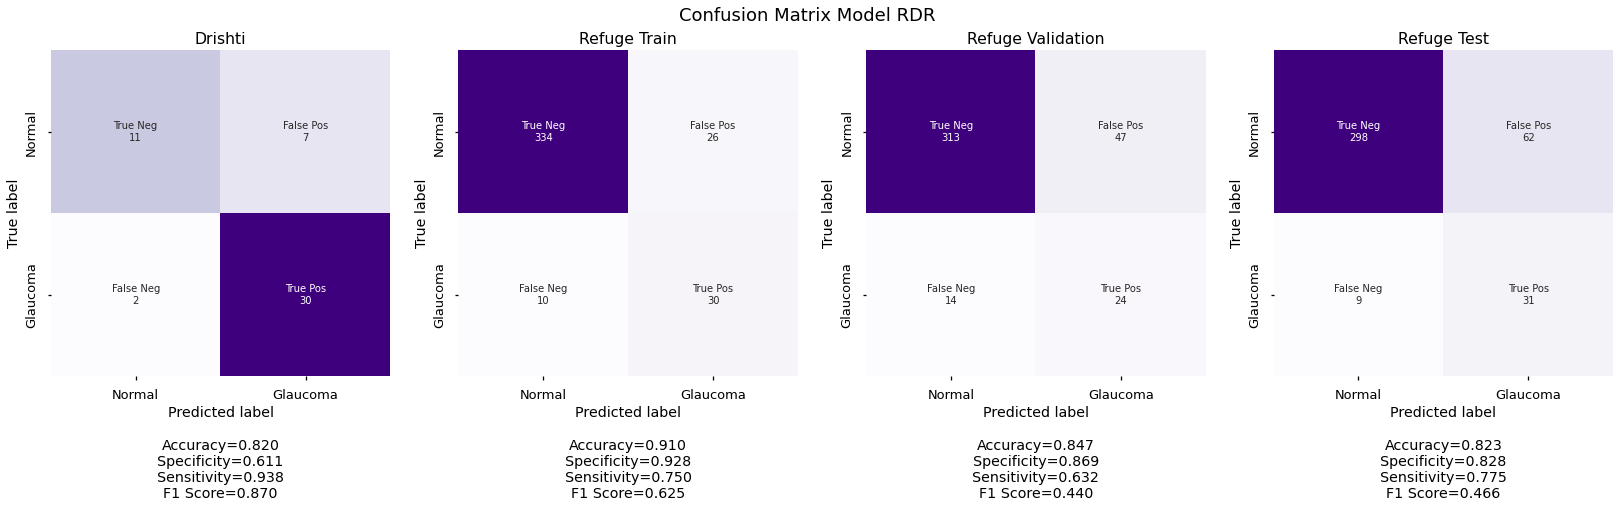

In [ ]:
ind = [ix_drishti, ix_refuge, ix_refugeval, ix_refugetest]
name = ['Drishti', 'Refuge Train', 'Refuge Validation', 'Refuge Test']
y_pred = [lr_rim]
feature = ['RDR']

for i in range(len(feature)):
  title = 'Confusion Matrix Model {}'.format(feature[i])
  confMat(y_axes, y_pred[i], ind, name, title)
  print()

In [ ]:
print("{}\t\t\t\t{}\t{}\t{}".format("Fitur", "Acc", "Spe", "Sen"))
tab = ["\t\t\t"]
for i in range(len(y_pred)):
  cfm = confusion_matrix(y_norm[ind[0]], y_pred[i][ind[0]])
  accuracy  = np.trace(cfm) / float(np.sum(cfm))
  precision   = cfm[1,1] / sum(cfm[:,1])
  recall      = cfm[1,1] / sum(cfm[1,:])
  spe         = cfm[0,0] / sum(cfm[0,:])
  f1_score    = 2*precision*recall / (precision + recall)
  print("{}{}\t{:0.3f}\t{:0.3f}\t{:0.3f}".format(feature[i], tab[i], accuracy, spe, recall))

Fitur				Acc	Spe	Sen
RDR				0.820	0.611	0.938


# Explore Best Model

In [ ]:
df_class_norm = pd.read_json(json_class_norm)
df_class_norm = df_class_norm.reset_index(drop=True)
df_class_norm.groupby(['tag', 'Prediction']).size()

tag       Prediction
Glaucoma  Glaucoma       116
          Normal          34
Normal    Glaucoma        31
          Normal        1067
dtype: int64

In [ ]:
df_class_axes = pd.read_json(json_class_axes)
df_class_axes = df_class_axes.reset_index(drop=True)
df_class_axes.groupby(['tag', 'Prediction']).size()

tag       Prediction
Glaucoma  Glaucoma       119
          Normal          31
Normal    Glaucoma        30
          Normal        1068
dtype: int64

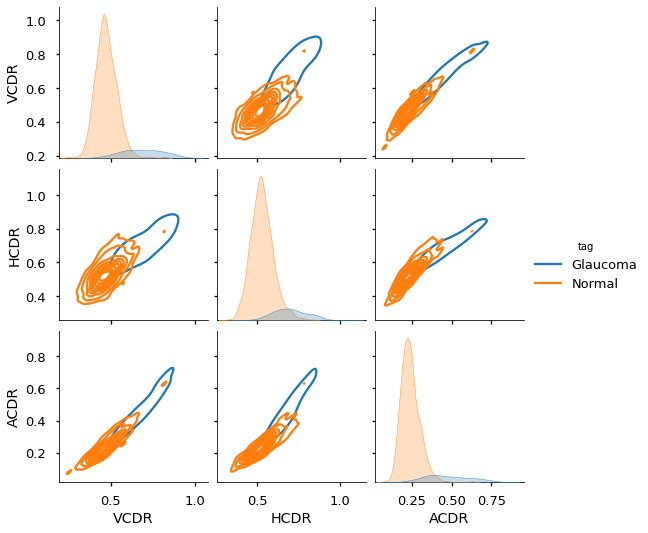

In [ ]:
sns.pairplot(
    df_class_axes, hue="tag", 
    x_vars=["VCDR", "HCDR", "ACDR"],
    y_vars=["VCDR", "HCDR", "ACDR"],
    kind="kde"
)

In [ ]:
df_class_rim = pd.read_json(json_class_rim)
df_class_rim = df_class_rim.reset_index(drop=True)
df_class_rim.groupby(['dataset', 'Prediction']).size()

dataset       Prediction
drishti       Glaucoma       37
              Normal         13
refuge test   Glaucoma       93
              Normal        307
refuge train  Glaucoma       56
              Normal        344
refuge val    Glaucoma       71
              Normal        327
dtype: int64

## Normal

In [ ]:
df_class_norm.columns

Index(['file_name', 'tag', 'path_img_loc', 'path_OD_loc', 'path_OC_loc',
       'dataset', 'path_OD_fixed', 'path_OC_fixed', 'Fscore_OD_fit',
       'Fscore_OC_fit', 'VCDR', 'HCDR', 'ACDR', 'centerOD', 'centerOC',
       'featOD', 'featOC', 'angle', 'VCDR_gt', 'HCDR_gt', 'ACDR_gt',
       'centerOD_gt', 'centerOC_gt', 'featOD_gt', 'featOC_gt', 'angle_gt',
       'VCDR_mae', 'HCDR_mae', 'ACDR_mae', 'Prediction', 'Probabilities',
       'RDR', 'RDR_gt'],
      dtype='object')

### CDR

In [ ]:
print("TN:")
MeanScore(df_class_norm['VCDR_mae'].loc[(df_class_norm["tag"] == "Normal") & (df_class_norm["Prediction"] == "Normal")])
print("FN:")
MeanScore(df_class_norm['VCDR_mae'].loc[(df_class_norm["tag"] == "Glaucoma") & (df_class_norm["Prediction"] == "Normal")])
print("FP:")
MeanScore(df_class_norm['VCDR_mae'].loc[(df_class_norm["tag"] == "Normal") & (df_class_norm["Prediction"] == "Glaucoma")])
print("TP:")
MeanScore(df_class_norm['VCDR_mae'].loc[(df_class_norm["tag"] == "Glaucoma") & (df_class_norm["Prediction"] == "Glaucoma")])

TN:
0.036 ± 0.031
FN:
0.050 ± 0.055
FP:
0.038 ± 0.035
TP:
0.037 ± 0.036


In [ ]:
print("TN:")
MeanScore(df_class_norm['HCDR_mae'].loc[(df_class_norm["tag"] == "Normal") & (df_class_norm["Prediction"] == "Normal")])
print("FN:")
MeanScore(df_class_norm['HCDR_mae'].loc[(df_class_norm["tag"] == "Glaucoma") & (df_class_norm["Prediction"] == "Normal")])
print("FP:")
MeanScore(df_class_norm['HCDR_mae'].loc[(df_class_norm["tag"] == "Normal") & (df_class_norm["Prediction"] == "Glaucoma")])
print("TP:")
MeanScore(df_class_norm['HCDR_mae'].loc[(df_class_norm["tag"] == "Glaucoma") & (df_class_norm["Prediction"] == "Glaucoma")])

TN:
0.042 ± 0.035
FN:
0.060 ± 0.040
FP:
0.046 ± 0.042
TP:
0.056 ± 0.054


In [ ]:
print("TN:")
MeanScore(df_class_norm['ACDR_mae'].loc[(df_class_norm["tag"] == "Normal") & (df_class_norm["Prediction"] == "Normal")])
print("FN:")
MeanScore(df_class_norm['ACDR_mae'].loc[(df_class_norm["tag"] == "Glaucoma") & (df_class_norm["Prediction"] == "Normal")])
print("FP:")
MeanScore(df_class_norm['ACDR_mae'].loc[(df_class_norm["tag"] == "Normal") & (df_class_norm["Prediction"] == "Glaucoma")])
print("TP:")
MeanScore(df_class_norm['ACDR_mae'].loc[(df_class_norm["tag"] == "Glaucoma") & (df_class_norm["Prediction"] == "Glaucoma")])

TN:
0.030 ± 0.026
FN:
0.048 ± 0.045
FP:
0.041 ± 0.039
TP:
0.053 ± 0.047


### False Negative

In [ ]:
df_class_norm1 = df_class_norm.loc[(df_class_norm["tag"] == "Glaucoma") & (df_class_norm["Prediction"] == "Normal")]
# df_class_norm1 = df_class_norm1.sort_values("Probabilities", ascending=True)
ind_norm1 = df_class_norm1.index.tolist()
df_class_rim1 = df_feature_rim.loc[ind_norm1]

len(df_class_rim1)

34

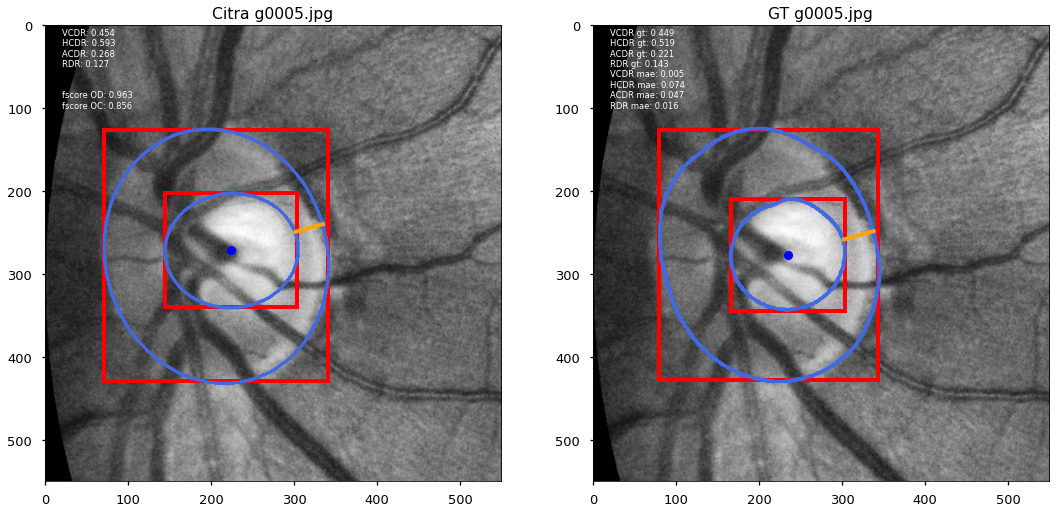

In [ ]:
@interact(i=(0, len(df_class_norm1)-1))
def show_patches(i=0):
  ROI = cv2.imread(df_class_norm1['path_img_loc'].iloc[i], 0)
  ROI = (resize(ROI, (550, 550), mode = 'constant', preserve_range = True))

  OD_fit = cv2.imread(df_class_norm1['path_OD_fixed'].iloc[i], 0)
  OC_fit = cv2.imread(df_class_norm1['path_OC_fixed'].iloc[i], 0)

  OD_gt = cv2.imread(df_class_norm1['path_OD_loc'].iloc[i], 0)
  OC_gt = cv2.imread(df_class_norm1['path_OC_loc'].iloc[i], 0)

  centerOD = df_class_norm1['centerOD'].iloc[i]
  centerOC = df_class_norm1['centerOC'].iloc[i]
  featOD = df_class_norm1['featOD'].iloc[i]
  featOC = df_class_norm1['featOC'].iloc[i]
  angle = df_class_norm1['angle'].iloc[i]

  rRim = df_class_rim1['radRim'].iloc[i]
  rOD = df_class_rim1['radOD'].iloc[i]

  boxOD = cv2.boxPoints((centerOD, tuple((featOD[1], featOD[0])), angle))
  boxOC = cv2.boxPoints((centerOC, tuple((featOC[1], featOC[0])), angle))

  centerOD_gt = df_class_norm1['centerOD_gt'].iloc[i]
  centerOC_gt = df_class_norm1['centerOC_gt'].iloc[i]
  featOD_gt = df_class_norm1['featOD_gt'].iloc[i]
  featOC_gt = df_class_norm1['featOC_gt'].iloc[i]
  angle_gt = df_class_norm1['angle_gt'].iloc[i]

  rRim_gt = df_class_rim1['radRim_gt'].iloc[i]
  rOD_gt = df_class_rim1['radOD_gt'].iloc[i]

  boxOD_gt = cv2.boxPoints((centerOD_gt, tuple((featOD_gt[1], featOD_gt[0])), angle_gt))
  boxOC_gt = cv2.boxPoints((centerOC_gt, tuple((featOC_gt[1], featOC_gt[0])), angle_gt))
  
  plt.figure(figsize=(18, 9))
  plt.subplot(121),
  plt.imshow(ROI, cmap='gray')
  plt.title('Citra {}'.format(df_class_norm1['file_name'].iloc[i]))
  plt.text(20, 50,
           'VCDR: {:.3f}\nHCDR: {:.3f}\nACDR: {:.3f}\nRDR: {:.3f}'.format(df_class_norm1['VCDR'].iloc[i],
                                                             df_class_norm1['HCDR'].iloc[i],
                                                             df_class_norm1['ACDR'].iloc[i],
                                                             df_class_rim1['RDR'].iloc[i]),
           size='small', color='w')
  plt.text(20, 100,
           'fscore OD: {:.3f}\nfscore OC: {:.3f}'.format(df_class_norm1['Fscore_OD_fit'].iloc[i],
                                                         df_class_norm1['Fscore_OC_fit'].iloc[i]),
           size='small', color='w')
  plt.contour(OD_fit, colors='royalblue')
  plt.contour(OC_fit, colors='royalblue')
  plt.gca().add_patch(Rectangle((boxOD[1]), featOD[1], featOD[0],
                                angle=angle, edgecolor='red',
                                facecolor='none', lw=4))
  plt.gca().add_patch(Rectangle((boxOC[1]), featOC[1], featOC[0],
                                angle=angle, edgecolor='red',
                                facecolor='none', lw=4))
  plt.plot(centerOC[0], centerOC[1], 'o', color='blue')
  plt.plot(rRim[0], rRim[1], color='orange', lw=4)
  plt.grid(False)

  plt.subplot(122),
  plt.imshow(ROI, cmap='gray')
  plt.title('GT {}'.format(df_class_norm1['file_name'].iloc[i]))
  plt.text(20, 50,
           'VCDR gt: {:.3f}\nHCDR gt: {:.3f}\nACDR gt: {:.3f}\nRDR gt: {:.3f}'.format(df_class_norm1['VCDR_gt'].iloc[i],
                                                                                       df_class_norm1['HCDR_gt'].iloc[i],
                                                                                       df_class_norm1['ACDR_gt'].iloc[i],
                                                                                       df_class_rim1['RDR_gt'].iloc[i]),
           size='small', color='w')
  plt.text(20, 100,
           'VCDR mae: {:.3f}\nHCDR mae: {:.3f}\nACDR mae: {:.3f}\nRDR mae: {:.3f}'.format(df_class_norm1['VCDR_mae'].iloc[i],
                                                                                          df_class_norm1['HCDR_mae'].iloc[i],
                                                                                          df_class_norm1['ACDR_mae'].iloc[i],
                                                                                          df_class_rim1['RDR_mae'].iloc[i]),
           size='small', color='w')
  plt.contour(OD_gt, colors='royalblue')
  plt.contour(OC_gt, colors='royalblue')
  plt.gca().add_patch(Rectangle((boxOD_gt[1]), featOD_gt[1], featOD_gt[0],
                                angle=angle_gt, edgecolor='red',
                                facecolor='none', lw=4))
  plt.gca().add_patch(Rectangle((boxOC_gt[1]), featOC_gt[1], featOC_gt[0],
                                angle=angle_gt, edgecolor='red',
                                facecolor='none', lw=4))
  plt.plot(centerOC_gt[0], centerOC_gt[1], 'o', color='blue')
  plt.plot(rRim_gt[0], rRim_gt[1], color='orange', lw=4)
  plt.grid(False)

  print(df_class_norm1['Probabilities'].iloc[i])

# OC kekecilan = [2, 3, 15, 17, 21]
# OD kegedean = [13]

### False Positive

In [ ]:
df_class_norm2 = df_class_norm.loc[(df_class_norm["tag"] == "Normal") & (df_class_norm["Prediction"] == "Glaucoma")]
df_class_norm2 = df_class_norm2.sort_values("Probabilities", ascending=True)
ind_norm2 = df_class_norm2.index.tolist()
df_class_rim2 = df_feature_rim.loc[ind_norm2]

len(df_class_rim2)

In [ ]:
@interact(i=(0, len(df_class_norm2)-1))
def show_patches(i=0):
  ROI = cv2.imread(df_class_norm2['path_img_loc'].iloc[i], 0)
  ROI = (resize(ROI, (550, 550), mode = 'constant', preserve_range = True))

  OD_fit = cv2.imread(df_class_norm2['path_OD_fixed'].iloc[i], 0)
  OC_fit = cv2.imread(df_class_norm2['path_OC_fixed'].iloc[i], 0)

  OD_gt = cv2.imread(df_class_norm2['path_OD_loc'].iloc[i], 0)
  OC_gt = cv2.imread(df_class_norm2['path_OC_loc'].iloc[i], 0)

  centerOD = df_class_norm2['centerOD'].iloc[i]
  centerOC = df_class_norm2['centerOC'].iloc[i]
  featOD = df_class_norm2['featOD'].iloc[i]
  featOC = df_class_norm2['featOC'].iloc[i]
  angle = df_class_norm2['angle'].iloc[i]

  rRim = df_class_rim2['radRim'].iloc[i]
  rOD = df_class_rim2['radOD'].iloc[i]

  boxOD = cv2.boxPoints((centerOD, tuple((featOD[1], featOD[0])), angle))
  boxOC = cv2.boxPoints((centerOC, tuple((featOC[1], featOC[0])), angle))

  centerOD_gt = df_class_norm2['centerOD_gt'].iloc[i]
  centerOC_gt = df_class_norm2['centerOC_gt'].iloc[i]
  featOD_gt = df_class_norm2['featOD_gt'].iloc[i]
  featOC_gt = df_class_norm2['featOC_gt'].iloc[i]
  angle_gt = df_class_norm2['angle_gt'].iloc[i]

  rRim_gt = df_class_rim2['radRim_gt'].iloc[i]
  rOD_gt = df_class_rim2['radOD_gt'].iloc[i]

  boxOD_gt = cv2.boxPoints((centerOD_gt, tuple((featOD_gt[1], featOD_gt[0])), angle_gt))
  boxOC_gt = cv2.boxPoints((centerOC_gt, tuple((featOC_gt[1], featOC_gt[0])), angle_gt))
  
  plt.figure(figsize=(18, 9))
  plt.subplot(121),
  plt.imshow(ROI, cmap='gray')
  plt.title('Citra {}'.format(df_class_norm2['file_name'].iloc[i]))
  plt.text(20, 50,
           'VCDR: {:.3f}\nHCDR: {:.3f}\nACDR: {:.3f}\nRDR: {:.3f}'.format(df_class_norm2['VCDR'].iloc[i],
                                                             df_class_norm2['HCDR'].iloc[i],
                                                             df_class_norm2['ACDR'].iloc[i],
                                                             df_class_rim2['RDR'].iloc[i]),
           size='small', color='w')
  plt.text(20, 100,
           'fscore OD: {:.3f}\nfscore OC: {:.3f}'.format(df_class_norm2['Fscore_OD_fit'].iloc[i],
                                                         df_class_norm2['Fscore_OC_fit'].iloc[i]),
           size='small', color='w')
  plt.contour(OD_fit, colors='royalblue')
  plt.contour(OC_fit, colors='royalblue')
  plt.gca().add_patch(Rectangle((boxOD[1]), featOD[1], featOD[0],
                                angle=angle, edgecolor='red',
                                facecolor='none', lw=4))
  plt.gca().add_patch(Rectangle((boxOC[1]), featOC[1], featOC[0],
                                angle=angle, edgecolor='red',
                                facecolor='none', lw=4))
  plt.plot(centerOC[0], centerOC[1], 'o', color='blue')
  plt.plot(rRim[0], rRim[1], color='orange', lw=4)
  plt.grid(False)

  plt.subplot(122),
  plt.imshow(ROI, cmap='gray')
  plt.title('GT {}'.format(df_class_norm2['file_name'].iloc[i]))
  plt.text(20, 50,
           'VCDR gt: {:.3f}\nHCDR gt: {:.3f}\nACDR gt: {:.3f}\nRDR gt: {:.3f}'.format(df_class_norm2['VCDR_gt'].iloc[i],
                                                                                       df_class_norm2['HCDR_gt'].iloc[i],
                                                                                       df_class_norm2['ACDR_gt'].iloc[i],
                                                                                       df_class_rim2['RDR_gt'].iloc[i]),
           size='small', color='w')
  plt.text(20, 100,
           'VCDR mae: {:.3f}\nHCDR mae: {:.3f}\nACDR mae: {:.3f}\nRDR mae: {:.3f}'.format(df_class_norm2['VCDR_mae'].iloc[i],
                                                                                          df_class_norm2['HCDR_mae'].iloc[i],
                                                                                          df_class_norm2['ACDR_mae'].iloc[i],
                                                                                          df_class_rim2['RDR_mae'].iloc[i]),
           size='small', color='w')
  plt.contour(OD_gt, colors='royalblue')
  plt.contour(OC_gt, colors='royalblue')
  plt.gca().add_patch(Rectangle((boxOD_gt[1]), featOD_gt[1], featOD_gt[0],
                                angle=angle_gt, edgecolor='red',
                                facecolor='none', lw=4))
  plt.gca().add_patch(Rectangle((boxOC_gt[1]), featOC_gt[1], featOC_gt[0],
                                angle=angle_gt, edgecolor='red',
                                facecolor='none', lw=4))
  plt.plot(centerOC_gt[0], centerOC_gt[1], 'o', color='blue')
  plt.plot(rRim_gt[0], rRim_gt[1], color='orange', lw=4)
  plt.grid(False)

  print(df_class_norm2['Probabilities'].iloc[i])

## Axes

### Angle

In [ ]:
# print("TN:")
# MeanScore(df_class_axes['angle_mae'].loc[(df_class_axes["tag"] == "Normal") & (df_class_axes["Prediction"] == "Normal")])
# print("FN:")
# MeanScore(df_class_axes['angle_mae'].loc[(df_class_axes["tag"] == "Glaucoma") & (df_class_axes["Prediction"] == "Normal")])
# print("FP:")
# MeanScore(df_class_axes['angle_mae'].loc[(df_class_axes["tag"] == "Normal") & (df_class_axes["Prediction"] == "Glaucoma")])
# print("TP:")
# MeanScore(df_class_axes['angle_mae'].loc[(df_class_axes["tag"] == "Glaucoma") & (df_class_axes["Prediction"] == "Glaucoma")])

### CDR

In [ ]:
print("TN:")
MeanScore(df_class_axes['VCDR'].loc[(df_class_axes["tag"] == "Normal") & (df_class_axes["Prediction"] == "Normal")])
print("FN:")
MeanScore(df_class_axes['VCDR'].loc[(df_class_axes["tag"] == "Glaucoma") & (df_class_axes["Prediction"] == "Normal")])
print("FP:")
MeanScore(df_class_axes['VCDR'].loc[(df_class_axes["tag"] == "Normal") & (df_class_axes["Prediction"] == "Glaucoma")])
print("TP:")
MeanScore(df_class_axes['VCDR'].loc[(df_class_axes["tag"] == "Glaucoma") & (df_class_axes["Prediction"] == "Glaucoma")])

In [ ]:
print("TN:")
MeanScore(df_class_axes['HCDR'].loc[(df_class_axes["tag"] == "Normal") & (df_class_axes["Prediction"] == "Normal") & (df_class_axes["dataset"] == "drishti")])
print("FN:")
MeanScore(df_class_axes['HCDR'].loc[(df_class_axes["tag"] == "Glaucoma") & (df_class_axes["Prediction"] == "Normal") & (df_class_axes["dataset"] == "drishti")])
print("FP:")
MeanScore(df_class_axes['HCDR'].loc[(df_class_axes["tag"] == "Normal") & (df_class_axes["Prediction"] == "Glaucoma") & (df_class_axes["dataset"] == "drishti")])
print("TP:")
MeanScore(df_class_axes['HCDR'].loc[(df_class_axes["tag"] == "Glaucoma") & (df_class_axes["Prediction"] == "Glaucoma") & (df_class_axes["dataset"] == "drishti")])

In [ ]:
print("TN:")
MeanScore(df_class_axes['ACDR'].loc[(df_class_axes["tag"] == "Normal") & (df_class_axes["Prediction"] == "Normal") & (df_class_axes["dataset"] == "drishti")])
print("FN:")
MeanScore(df_class_axes['ACDR'].loc[(df_class_axes["tag"] == "Glaucoma") & (df_class_axes["Prediction"] == "Normal") & (df_class_axes["dataset"] == "drishti")])
print("FP:")
MeanScore(df_class_axes['ACDR'].loc[(df_class_axes["tag"] == "Normal") & (df_class_axes["Prediction"] == "Glaucoma") & (df_class_axes["dataset"] == "drishti")])
print("TP:")
MeanScore(df_class_axes['ACDR'].loc[(df_class_axes["tag"] == "Glaucoma") & (df_class_axes["Prediction"] == "Glaucoma") & (df_class_axes["dataset"] == "drishti")])

### False Negative

In [ ]:
# df_class_axes1 = df_class_axes.loc[(df_class_axes["tag"] == "Glaucoma") & (df_class_axes["Prediction"] == "Normal")]
df_class_axes1 = df_class_axes.loc[[57, 58, 64, 88, 481, 547, 628, 652, 673, 674, 699, 732, 780, 832, 978, 1048, 1162]]
# df_class_axes1 = df_class_axes1.sort_values("Probabilities")
ind_axes1 = df_class_axes1.index.tolist()
df_class_rim1 = df_class_rim.loc[ind_axes1]

len(df_class_rim1)

17

Kesalahan Segmentasi

> 577, 661, 834, 875, 1023, 1097, 1207

Tidak sesuai dengan aturan CDR
*   Sesuai dengan aturan RDR

> 54, 61, 72, 898, 1002, 1167, 1215

*   Tidak sesuai dengan RDR

> 57, 58, 64, 88, 481, 547, 628, 652, 673*, 674, 699, 732*, 780, 832, 978, 1048, 1162*

In [ ]:
@interact(i=(0, len(df_class_axes1)-1))
def show_patches(i=0):
  ROI = cv2.imread(df_class_axes1['path_img_loc'].iloc[i], 0)
  ROI = (resize(ROI, (550, 550), mode = 'constant', preserve_range = True))

  OD_fit = cv2.imread(df_class_axes1['path_OD_fixed'].iloc[i], 0)
  OC_fit = cv2.imread(df_class_axes1['path_OC_fixed'].iloc[i], 0)

  OD_gt = cv2.imread(df_class_axes1['path_OD_loc'].iloc[i], 0)
  OC_gt = cv2.imread(df_class_axes1['path_OC_loc'].iloc[i], 0)

  centerOD = df_class_axes1['centerOD'].iloc[i]
  centerOC = df_class_axes1['centerOC'].iloc[i]
  featOD = df_class_axes1['featOD'].iloc[i]
  featOC = df_class_axes1['featOC'].iloc[i]
  angle = df_class_axes1['angle'].iloc[i]

  rRim = df_class_rim1['radRim'].iloc[i]
  rOD = df_class_rim1['radOD'].iloc[i]

  boxOD = cv2.boxPoints((centerOD, tuple((featOD[1], featOD[0])), angle))
  boxOC = cv2.boxPoints((centerOC, tuple((featOC[1], featOC[0])), angle))

  centerOD_gt = df_class_axes1['centerOD_gt'].iloc[i]
  centerOC_gt = df_class_axes1['centerOC_gt'].iloc[i]
  featOD_gt = df_class_axes1['featOD_gt'].iloc[i]
  featOC_gt = df_class_axes1['featOC_gt'].iloc[i]
  angle_gt = df_class_axes1['angle_gt'].iloc[i]

  rRim_gt = df_class_rim1['radRim_gt'].iloc[i]
  rOD_gt = df_class_rim1['radOD_gt'].iloc[i]

  boxOD_gt = cv2.boxPoints((centerOD_gt, tuple((featOD_gt[1], featOD_gt[0])), angle_gt))
  boxOC_gt = cv2.boxPoints((centerOC_gt, tuple((featOC_gt[1], featOC_gt[0])), angle_gt))
  
  plt.figure(figsize=(18, 9))
  plt.subplot(121),
  plt.imshow(ROI, cmap='gray')
  plt.title('Citra {}'.format(df_class_axes1['file_name'].iloc[i]))
  plt.text(20, 50,
           'VCDR: {:.3f}\nHCDR: {:.3f}\nACDR: {:.3f}\nRDR: {:.3f}'.format(df_class_axes1['VCDR'].iloc[i],
                                                             df_class_axes1['HCDR'].iloc[i],
                                                             df_class_axes1['ACDR'].iloc[i],
                                                             df_class_rim1['RDR'].iloc[i]),
           size='small', color='w')
  plt.text(20, 100,
           'fscore OD: {:.3f}\nfscore OC: {:.3f}'.format(df_class_axes1['Fscore_OD_fit'].iloc[i],
                                                         df_class_axes1['Fscore_OC_fit'].iloc[i]),
           size='small', color='w')
  plt.contour(OD_fit, colors='royalblue')
  plt.contour(OC_fit, colors='royalblue')
  plt.gca().add_patch(Rectangle((boxOD[1]), featOD[1], featOD[0],
                                angle=angle, edgecolor='red',
                                facecolor='none', lw=4))
  plt.gca().add_patch(Rectangle((boxOC[1]), featOC[1], featOC[0],
                                angle=angle, edgecolor='red',
                                facecolor='none', lw=4))
  plt.plot(centerOC[0], centerOC[1], 'o', color='blue')
  # plt.plot(rRim[0], rRim[1], color='orange', lw=4)
  plt.grid(False)

  plt.subplot(122),
  plt.imshow(ROI, cmap='gray')
  plt.title('GT {}'.format(df_class_axes1['file_name'].iloc[i]))
  plt.text(20, 50,
           'VCDR gt: {:.3f}\nHCDR gt: {:.3f}\nACDR gt: {:.3f}\nRDR gt: {:.3f}'.format(df_class_axes1['VCDR_gt'].iloc[i],
                                                                                       df_class_axes1['HCDR_gt'].iloc[i],
                                                                                       df_class_axes1['ACDR_gt'].iloc[i],
                                                                                       df_class_rim1['RDR_gt'].iloc[i]),
           size='small', color='w')
  plt.text(20, 100,
           'VCDR mae: {:.3f}\nHCDR mae: {:.3f}\nACDR mae: {:.3f}\nRDR mae: {:.3f}'.format(df_class_axes1['VCDR_mae'].iloc[i],
                                                                                          df_class_axes1['HCDR_mae'].iloc[i],
                                                                                          df_class_axes1['ACDR_mae'].iloc[i],
                                                                                          df_class_rim1['RDR_mae'].iloc[i]),
           size='small', color='w')
  plt.contour(OD_gt, colors='royalblue')
  plt.contour(OC_gt, colors='royalblue')
  plt.gca().add_patch(Rectangle((boxOD_gt[1]), featOD_gt[1], featOD_gt[0],
                                angle=angle_gt, edgecolor='red',
                                facecolor='none', lw=4))
  plt.gca().add_patch(Rectangle((boxOC_gt[1]), featOC_gt[1], featOC_gt[0],
                                angle=angle_gt, edgecolor='red',
                                facecolor='none', lw=4))
  plt.plot(centerOC_gt[0], centerOC_gt[1], 'o', color='blue')
  #plt.plot(rRim_gt[0], rRim_gt[1], color='orange', lw=4)

  plt.grid(False)
  print(ind_axes1[i])
  print("Probabilities\t: {}".format(df_class_axes1['Probabilities'].iloc[i]))
  print("Prediction rim\t: {}".format(df_class_rim1['Prediction'].iloc[i]))
  print("Prediction GT\t: {}".format(df_class_axes1['Prediction_gt'].iloc[i]))

interactive(children=(IntSlider(value=0, description='i', max=16), Output()), _dom_classes=('widget-interact',…

### False Positive

Kesalahan Segmentasi

> 483, 582, 759, 793, 977, 1024

Tidak sesuai dengan aturan CDR
*   Sesuai dengan aturan RDR

> 128, 368, 378, 845, 847, 868, 894, 1138

*   Tidak sesuai dengan RDR

> 14, 15, 16, 17, 28, 48, 132, 319, 334, 541, 567, 698, 730, 734, 966, 1145

In [ ]:
# df_class_axes2 = df_class_axes.loc[(df_class_axes["tag"] == "Normal") & (df_class_axes["Prediction"] == "Glaucoma")]
df_class_axes2 = df_class_axes.loc[[14, 15, 16, 17, 28, 48, 132, 319, 334, 541, 567, 698, 730, 734, 966, 1145]]
# df_class_axes1 = df_class_axes1.sort_values("HCDR_mae")
ind_axes2 = df_class_axes2.index.tolist()
df_class_rim2 = df_class_rim.loc[ind_axes2]

len(df_class_rim2)

16

In [24]:
@interact(i=(0, len(df_class_axes2)-1))
def show_patches(i=0):
  ROI = cv2.imread(df_class_axes2['path_img_loc'].iloc[i], 0)
  ROI = (resize(ROI, (550, 550), mode = 'constant', preserve_range = True))

  OD_fit = cv2.imread(df_class_axes2['path_OD_fixed'].iloc[i], 0)
  OC_fit = cv2.imread(df_class_axes2['path_OC_fixed'].iloc[i], 0)

  OD_gt = cv2.imread(df_class_axes2['path_OD_loc'].iloc[i], 0)
  OC_gt = cv2.imread(df_class_axes2['path_OC_loc'].iloc[i], 0)

  centerOD = df_class_axes2['centerOD'].iloc[i]
  centerOC = df_class_axes2['centerOC'].iloc[i]
  featOD = df_class_axes2['featOD'].iloc[i]
  featOC = df_class_axes2['featOC'].iloc[i]
  angle = df_class_axes2['angle'].iloc[i]

  rRim = df_class_rim2['radRim'].iloc[i]
  rOD = df_class_rim2['radOD'].iloc[i]

  boxOD = cv2.boxPoints((centerOD, tuple((featOD[1], featOD[0])), angle))
  boxOC = cv2.boxPoints((centerOC, tuple((featOC[1], featOC[0])), angle))

  centerOD_gt = df_class_axes2['centerOD_gt'].iloc[i]
  centerOC_gt = df_class_axes2['centerOC_gt'].iloc[i]
  featOD_gt = df_class_axes2['featOD_gt'].iloc[i]
  featOC_gt = df_class_axes2['featOC_gt'].iloc[i]
  angle_gt = df_class_axes2['angle_gt'].iloc[i]

  rRim_gt = df_class_rim2['radRim_gt'].iloc[i]
  rOD_gt = df_class_rim2['radOD_gt'].iloc[i]

  boxOD_gt = cv2.boxPoints((centerOD_gt, tuple((featOD_gt[1], featOD_gt[0])), angle_gt))
  boxOC_gt = cv2.boxPoints((centerOC_gt, tuple((featOC_gt[1], featOC_gt[0])), angle_gt))
  
  plt.figure(figsize=(18, 9))
  plt.subplot(121),
  plt.imshow(ROI, cmap='gray')
  plt.title('Citra {}'.format(df_class_axes2['file_name'].iloc[i]))
  plt.text(20, 50,
           'VCDR: {:.3f}\nHCDR: {:.3f}\nACDR: {:.3f}\nRDR: {:.3f}'.format(df_class_axes2['VCDR'].iloc[i],
                                                             df_class_axes2['HCDR'].iloc[i],
                                                             df_class_axes2['ACDR'].iloc[i],
                                                             df_class_rim2['RDR'].iloc[i]),
           size='small', color='w')
  plt.text(20, 100,
           'fscore OD: {:.3f}\nfscore OC: {:.3f}'.format(df_class_axes2['Fscore_OD_fit'].iloc[i],
                                                         df_class_axes2['Fscore_OC_fit'].iloc[i]),
           size='small', color='w')
  plt.contour(OD_fit, colors='royalblue')
  plt.contour(OC_fit, colors='royalblue')
  plt.gca().add_patch(Rectangle((boxOD[1]), featOD[1], featOD[0],
                                angle=angle, edgecolor='red',
                                facecolor='none', lw=4))
  plt.gca().add_patch(Rectangle((boxOC[1]), featOC[1], featOC[0],
                                angle=angle, edgecolor='red',
                                facecolor='none', lw=4))
  plt.plot(centerOC[0], centerOC[1], 'o', color='blue')
  # plt.plot(rRim[0], rRim[1], color='orange', lw=4)
  plt.grid(False)

  plt.subplot(122),
  plt.imshow(ROI, cmap='gray')
  plt.title('GT {}'.format(df_class_axes2['file_name'].iloc[i]))
  plt.text(20, 50,
           'VCDR gt: {:.3f}\nHCDR gt: {:.3f}\nACDR gt: {:.3f}\nRDR gt: {:.3f}'.format(df_class_axes2['VCDR_gt'].iloc[i],
                                                                                       df_class_axes2['HCDR_gt'].iloc[i],
                                                                                       df_class_axes2['ACDR_gt'].iloc[i],
                                                                                       df_class_rim2['RDR_gt'].iloc[i]),
           size='small', color='w')
  plt.text(20, 100,
           'VCDR mae: {:.3f}\nHCDR mae: {:.3f}\nACDR mae: {:.3f}\nRDR mae: {:.3f}'.format(df_class_axes2['VCDR_mae'].iloc[i],
                                                                                          df_class_axes2['HCDR_mae'].iloc[i],
                                                                                          df_class_axes2['ACDR_mae'].iloc[i],
                                                                                          df_class_rim2['RDR_mae'].iloc[i]),
           size='small', color='w')
  plt.contour(OD_gt, colors='royalblue')
  plt.contour(OC_gt, colors='royalblue')
  plt.gca().add_patch(Rectangle((boxOD_gt[1]), featOD_gt[1], featOD_gt[0],
                                angle=angle_gt, edgecolor='red',
                                facecolor='none', lw=4))
  plt.gca().add_patch(Rectangle((boxOC_gt[1]), featOC_gt[1], featOC_gt[0],
                                angle=angle_gt, edgecolor='red',
                                facecolor='none', lw=4))
  plt.plot(centerOC_gt[0], centerOC_gt[1], 'o', color='blue')
  # plt.plot(rRim_gt[0], rRim_gt[1], color='orange', lw=4)

  plt.grid(False)
  print(ind_axes2[i])
  print("Probabilities\t: {}".format(df_class_axes2['Probabilities'].iloc[i]))
  print("Prediction rim\t: {}".format(df_class_rim2['Prediction'].iloc[i]))
  print("Prediction GT\t: {}".format(df_class_axes2['Prediction_gt'].iloc[i]))

interactive(children=(IntSlider(value=0, description='i', max=15), Output()), _dom_classes=('widget-interact',…

## Hasil Klasifikasi RIM dan GT

## Rim

In [ ]:
print("TN:")
MeanScore(df_class_rim['RDR'].loc[(df_class_rim["tag"] == "Normal") & (df_class_rim["Prediction"] == "Normal")])
print("FN:")
MeanScore(df_class_rim['RDR'].loc[(df_class_rim["tag"] == "Glaucoma") & (df_class_rim["Prediction"] == "Normal")])
print("FP:")
MeanScore(df_class_rim['RDR'].loc[(df_class_rim["tag"] == "Normal") & (df_class_rim["Prediction"] == "Glaucoma")])
print("TP:")
MeanScore(df_class_rim['RDR'].loc[(df_class_rim["tag"] == "Glaucoma") & (df_class_rim["Prediction"] == "Glaucoma")])

TN:
0.198 ± 0.030
FN:
0.169 ± 0.020
FP:
0.105 ± 0.033
TP:
0.077 ± 0.043


In [ ]:
df_class_rim1 = df_class_rim.loc[(df_class_rim["tag"] == "Glaucoma") & (df_class_rim["Prediction"] == "Normal")]
# df_class_rim1 = df_class_rim1.sort_values("HCDR_mae")

len(df_class_rim1)

35

In [ ]:
ind = df_class_rim1.index.tolist()
@interact(i=(0, len(df_class_rim1)-1))
def show_patches_axes(i=0):
  ROI = cv2.imread(df_class_rim1['path_img_loc'].iloc[i], 0)
  ROI = (resize(ROI, (550, 550), mode = 'constant', preserve_range = True))

  OD_fit = cv2.imread(df_class_rim1['path_OD_fixed'].iloc[i], 0)
  OC_fit = cv2.imread(df_class_rim1['path_OC_fixed'].iloc[i], 0)
  cOC = getCenter(OC_fit)
  rRim = df_class_rim1['radRim'].iloc[i]
  rOD = df_class_rim1['radOD'].iloc[i]
  angle = df_class_rim1['angle'].iloc[i]

  OD_gt = cv2.imread(df_class_rim1['path_OD_loc'].iloc[i], 0)
  OC_gt = cv2.imread(df_class_rim1['path_OC_loc'].iloc[i], 0)
  cOC_gt = getCenter(OC_gt)
  rRim_gt = df_class_rim1['radRim_gt'].iloc[i]
  rOD_gt = df_class_rim1['radOD_gt'].iloc[i]
  angle_gt = df_class_rim1['angle_gt'].iloc[i]

  plt.figure(figsize=(15, 15))
  plt.subplot(221),
  plt.imshow(ROI, cmap='gray')
  plt.title('Citra {}'.format(df_class_rim1['file_name'].iloc[i]))
  plt.plot(cOC[0], cOC[1], 'o', color='red')
  plt.plot(rRim[0], rRim[1], color='red', lw=4)
  plt.contour(OD_fit, colors='royalblue')
  plt.contour(OC_fit, colors='royalblue')
  plt.text(20, 80, 'RDR: {:.3f}\n\nFScore OD: {:.3f}\nFScore OC: {:.3f}'.format(df_class_rim1['RDR'].iloc[i],
                                                                                df_class_rim1['Fscore_OD_fit'].iloc[i],
                                                                                df_class_rim1['Fscore_OC_fit'].iloc[i]),
           size='small', color='w')
  plt.grid(False)

  plt.subplot(222),
  plt.imshow(ROI, cmap='gray')
  plt.title('GT {}'.format(df_class_rim1['file_name'].iloc[i]))
  plt.plot(cOC_gt[0], cOC_gt[1], 'o', color='red')
  plt.plot(rRim_gt[0], rRim_gt[1], color='red', lw=4)
  plt.contour(OD_gt, colors='royalblue')
  plt.contour(OC_gt, colors='royalblue')
  plt.text(20, 50, 'RDR gt: {:.3f}\nRDR mae: {:.3f}'.format(df_class_rim1['RDR_gt'].iloc[i],
                                                             df_class_rim1['RDR_mae'].iloc[i]),
           size='small', color='w')
  plt.grid(False)

  plt.subplot(223),
  plt.imshow(ROI, cmap='gray')
  plt.plot(cOC[0], cOC[1], 'o', color='red')
  plt.plot(rOD[0], rOD[1], color='red', lw=4)
  plt.contour(OD_fit, colors='royalblue')
  plt.contour(OC_fit, colors='royalblue')
  plt.grid(False)

  plt.subplot(224),
  plt.imshow(ROI, cmap='gray')
  plt.plot(cOC_gt[0], cOC_gt[1], 'o', color='red')
  plt.plot(rOD_gt[0], rOD_gt[1], color='red', lw=4)
  plt.contour(OD_gt, colors='royalblue')
  plt.contour(OC_gt, colors='royalblue')
  plt.grid(False)

interactive(children=(IntSlider(value=0, description='i', max=34), Output()), _dom_classes=('widget-interact',…